In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [6]:
df=pd.read_csv("D:/COVID-19/covid_19_clean_complete.csv")

In [7]:
df.head(50)

Province/State            Country/Region        Lat  \
0                            NaN               Afghanistan  33.939110   
1                            NaN                   Albania  41.153300   
2                            NaN                   Algeria  28.033900   
3                            NaN                   Andorra  42.506300   
4                            NaN                    Angola -11.202700   
5                            NaN       Antigua and Barbuda  17.060800   
6                            NaN                 Argentina -38.416100   
7                            NaN                   Armenia  40.069100   
8   Australian Capital Territory                 Australia -35.473500   
9                New South Wales                 Australia -33.868800   
10            Northern Territory                 Australia -12.463400   
11                    Queensland                 Australia -27.469800   
12               South Australia                 Australia -34.928500   
13                      Tasmania                 Australia -42.882100   
14                      Victoria                 Australia -37.813600   
15             Western Australia                 Australia -31.950500   
16                           NaN                   Austria  47.516200   
17                           NaN                Azerbaijan  40.143100   
18                           NaN                   Bahamas  25.025885   
19                           NaN                   Bahrain  26.027500   
20                           NaN                Bangladesh  23.685000   
21                           NaN                  Barbados  13.193900   
22                           NaN                   Belarus  53.709800   
23                           NaN                   Belgium  50.833300   
24                           NaN                     Benin   9.307700   
25                           NaN                    Bhutan  27.514200   
26                           NaN                   Bolivia -16.290200   
27                           NaN    Bosnia and Herzegovina  43.915900   
28                           NaN                    Brazil -14.235000   
29                           NaN                    Brunei   4.535300   
30                           NaN                  Bulgaria  42.733900   
31                           NaN              Burkina Faso  12.238300   
32                           NaN                Cabo Verde  16.538800   
33                           NaN                  Cambodia  11.550000   
34                           NaN                  Cameroon   3.848000   
35                       Alberta                    Canada  53.933300   
36              British Columbia                    Canada  53.726700   
37                      Manitoba                    Canada  53.760900   
38                 New Brunswick                    Canada  46.565300   
39     Newfoundland and Labrador                    Canada  53.135500   
40                   Nova Scotia                    Canada  44.682000   
41                       Ontario                    Canada  51.253800   
42          Prince Edward Island                    Canada  46.510700   
43                        Quebec                    Canada  52.939900   
44                  Saskatchewan                    Canada  52.939900   
45                           NaN  Central African Republic   6.611100   
46                           NaN                      Chad  15.454200   
47                           NaN                     Chile -35.675100   
48                         Anhui                     China  31.825700   
49                       Beijing                     China  40.182400   

          Long        Date  Confirmed  Deaths  Recovered  Active  \
0    67.709953  22-01-2020          0       0          0       0   
1    20.168300  22-01-2020          0       0          0       0   
2     1.659600  22-01-2020          0       0          0       0   
3     1.521800  22-01-

In [19]:
df2=df.rename(columns={'Country/Region':'Country','Province/State':'State'},inplace=True)

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
imputer = SimpleImputer(strategy='constant')
df2_imputed = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
#df2_imputed = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)

In [54]:
#df3=df2_imputed.groupby(['Country','Date'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
df3 = df2_imputed.groupby(['Country', 'Date'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()


In [35]:
df3.head(20)

Country       Date Confirmed Deaths Recovered Active
0   Afghanistan 2020-01-22         0      0         0      0
1   Afghanistan 2020-01-23         0      0         0      0
2   Afghanistan 2020-01-24         0      0         0      0
3   Afghanistan 2020-01-25         0      0         0      0
4   Afghanistan 2020-01-26         0      0         0      0
5   Afghanistan 2020-01-27         0      0         0      0
6   Afghanistan 2020-01-28         0      0         0      0
7   Afghanistan 2020-01-29         0      0         0      0
8   Afghanistan 2020-01-30         0      0         0      0
9   Afghanistan 2020-01-31         0      0         0      0
10  Afghanistan 2020-02-01         0      0         0      0
11  Afghanistan 2020-02-02         0      0         0      0
12  Afghanistan 2020-02-03         0      0         0      0
13  Afghanistan 2020-02-04         0      0         0      0
14  Afghanistan 2020-02-05         0      0         0      0
15  Afghanistan 2020-02-06         0      0         0      0
16  Afghanistan 2020-02-07         0      0         0      0
17  Afghanistan 2020-02-08         0      0         0      0
18  Afghanistan 2020-02-09         0      0         0      0
19  Afghanistan 2020-02-10         0      0         0      0

In [37]:
countries = df3['Country'].unique()
len(countries)

187

In [39]:
df3.head()

Country       Date Confirmed Deaths Recovered Active
0  Afghanistan 2020-01-22         0      0         0      0
1  Afghanistan 2020-01-23         0      0         0      0
2  Afghanistan 2020-01-24         0      0         0      0
3  Afghanistan 2020-01-25         0      0         0      0
4  Afghanistan 2020-01-26         0      0         0      0

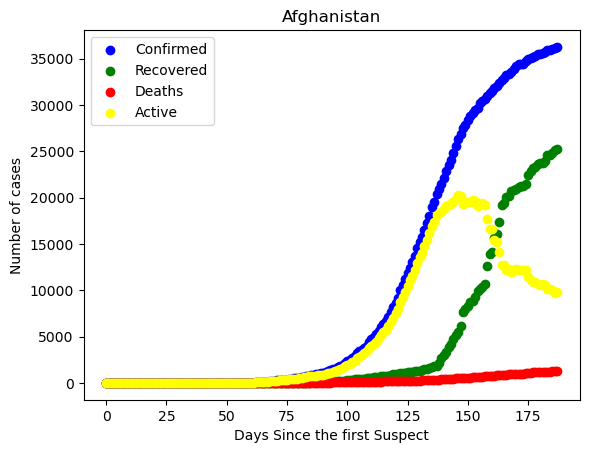

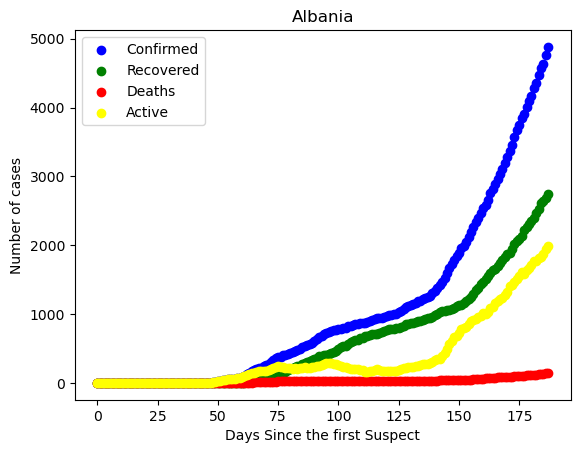

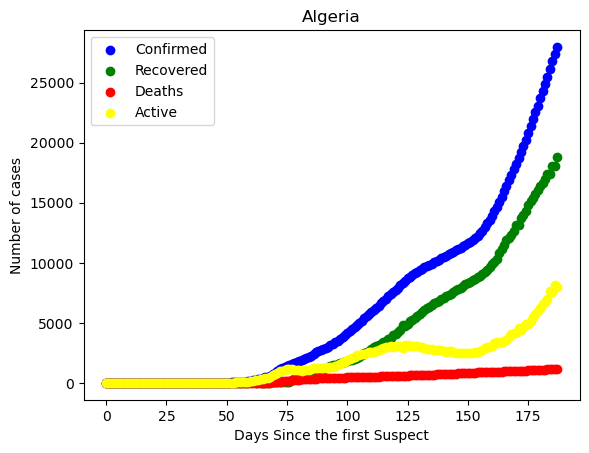

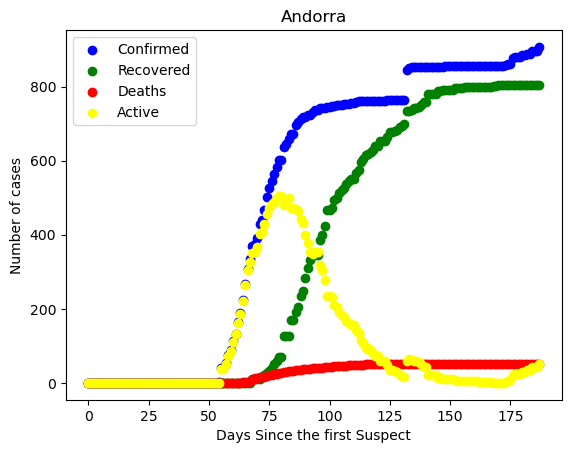

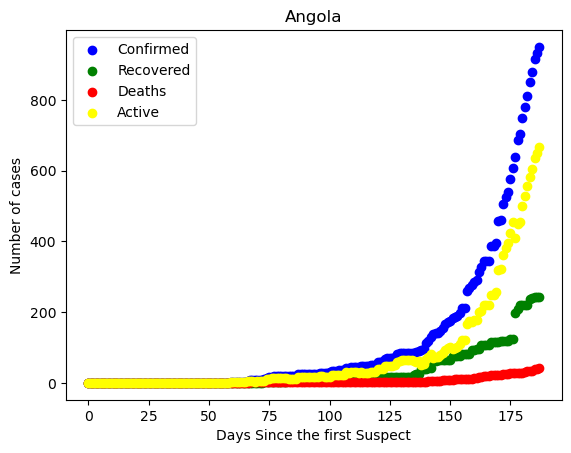

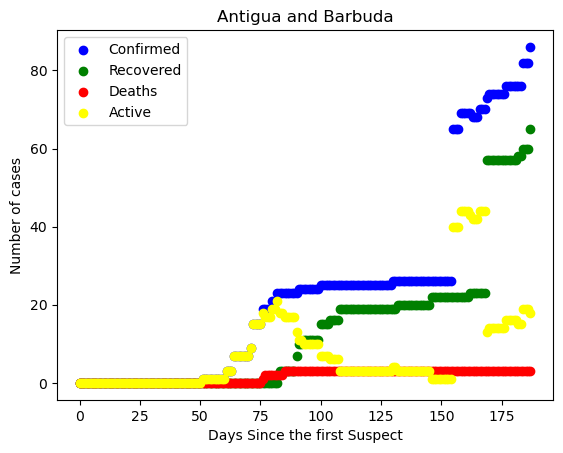

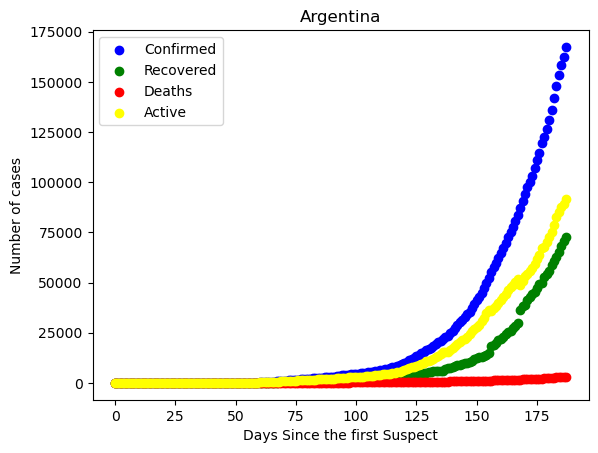

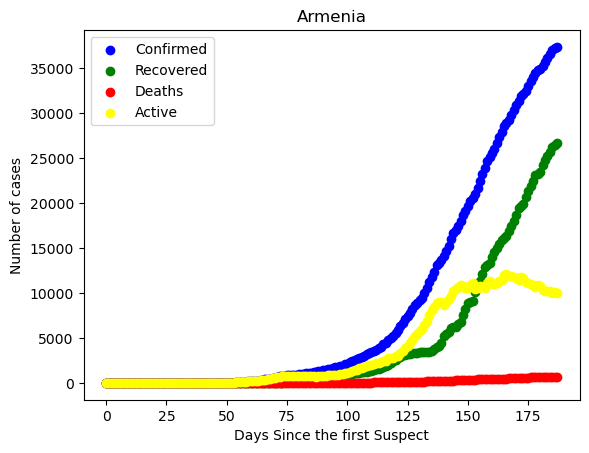

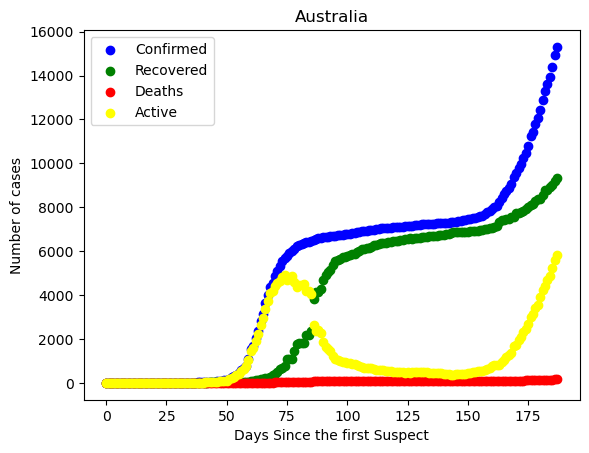

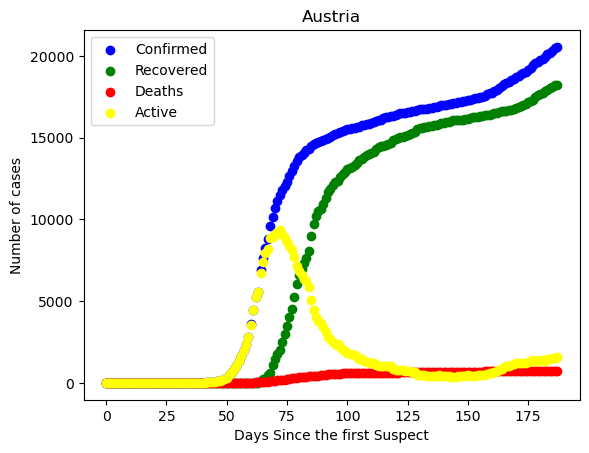

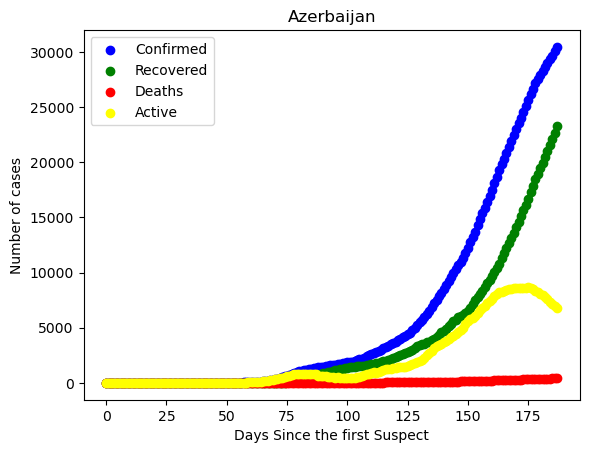

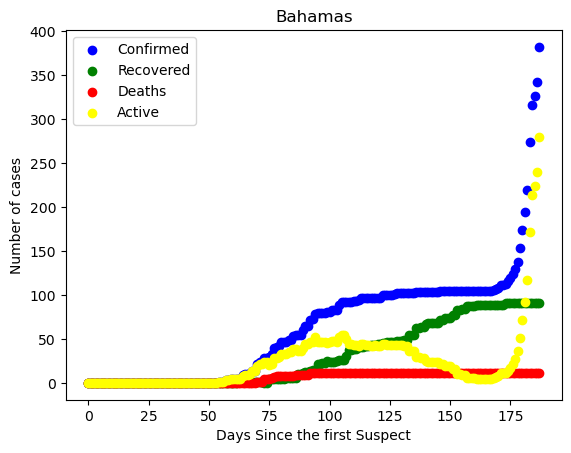

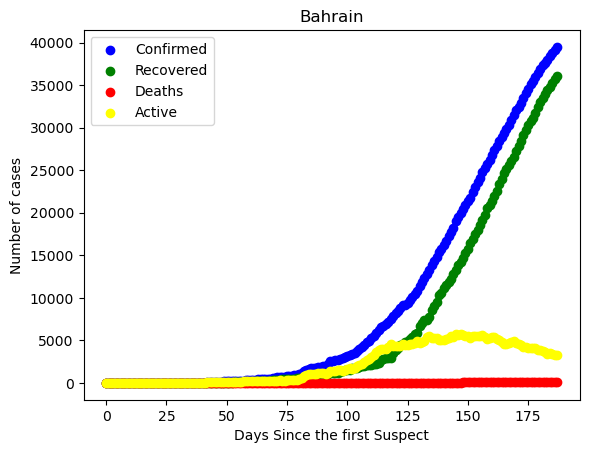

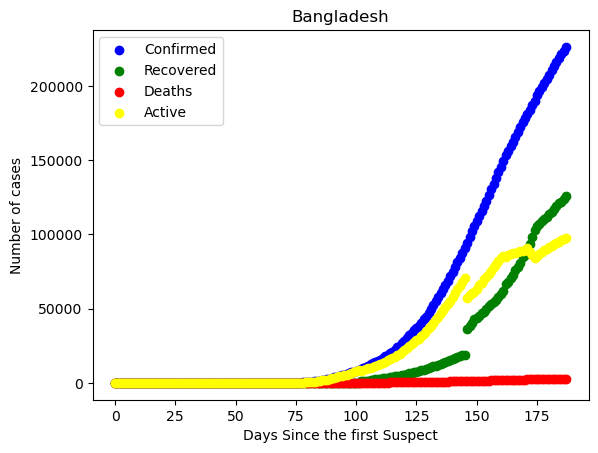

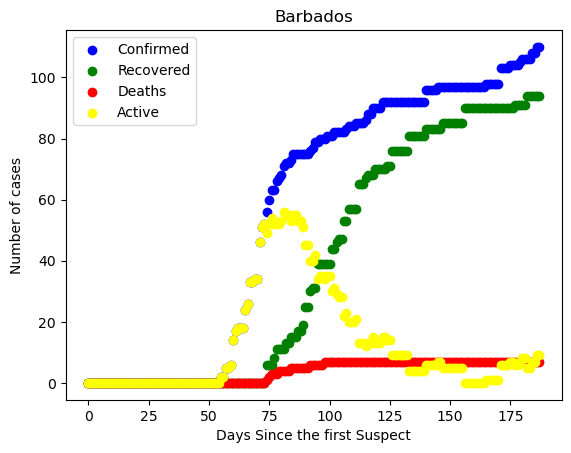

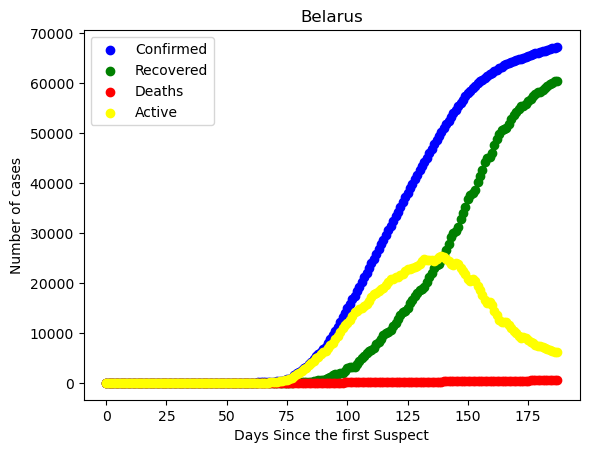

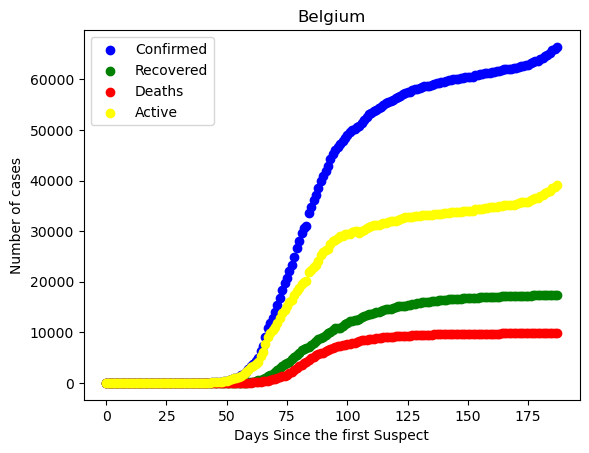

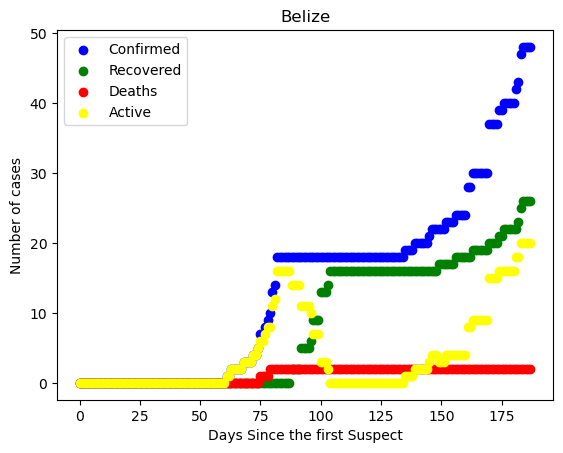

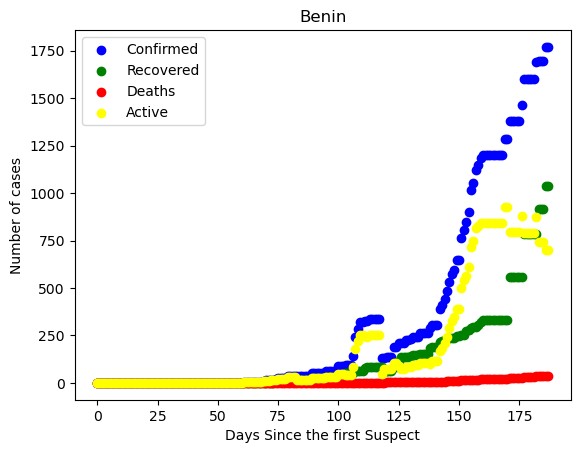

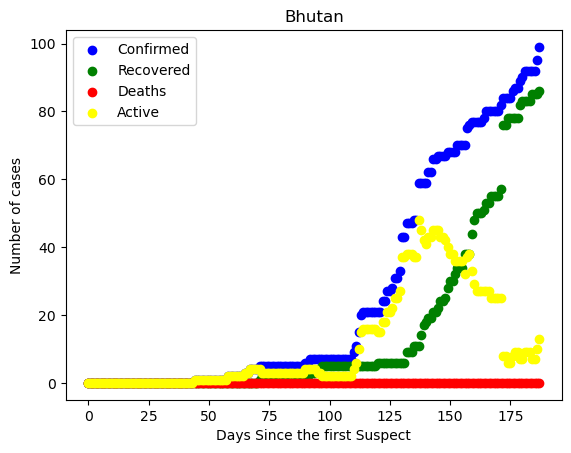

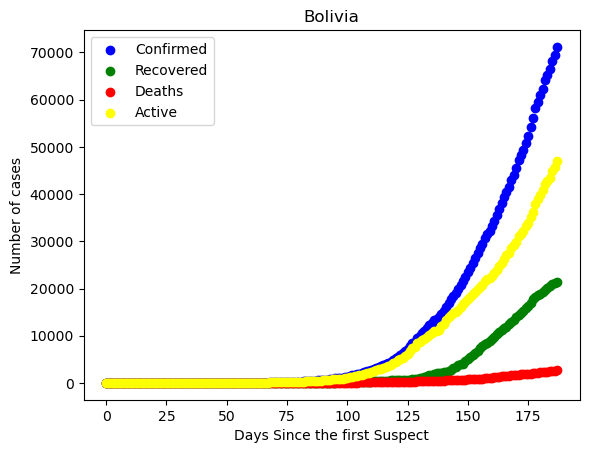

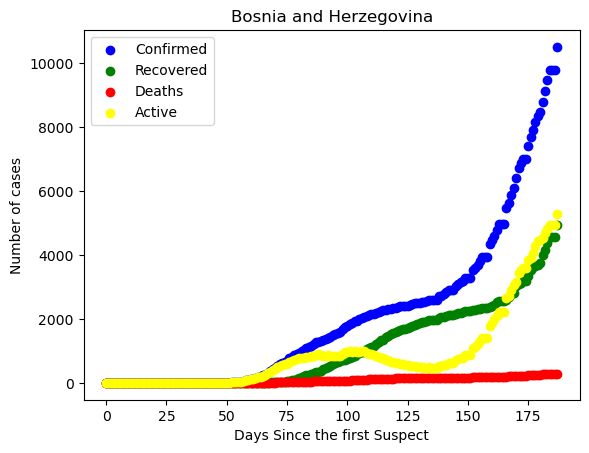

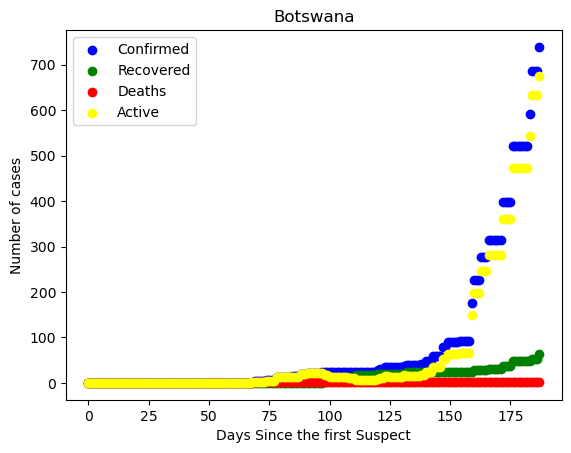

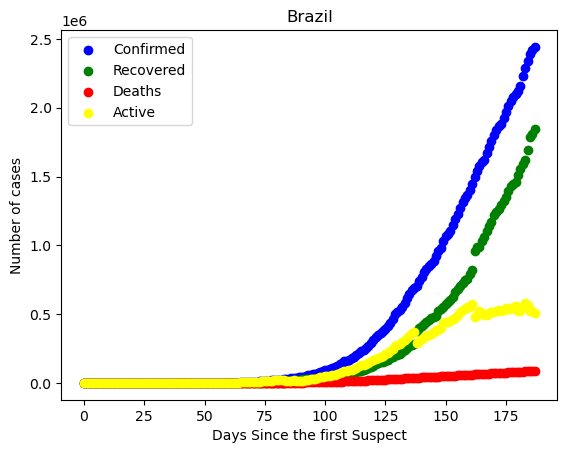

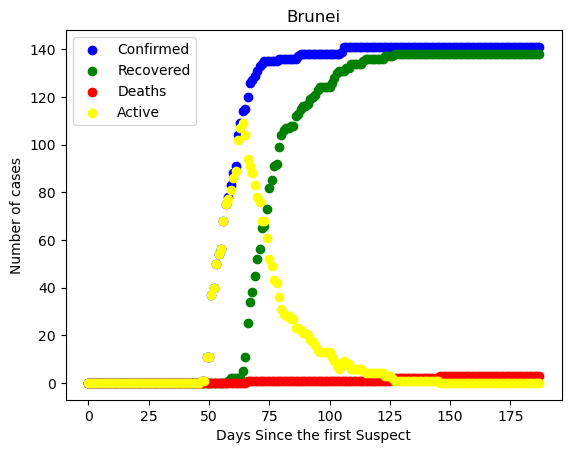

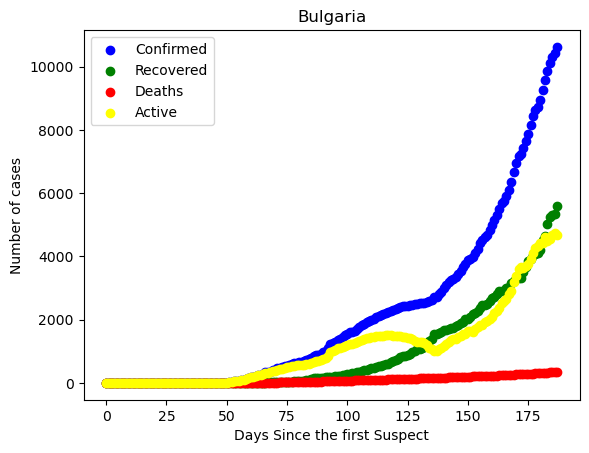

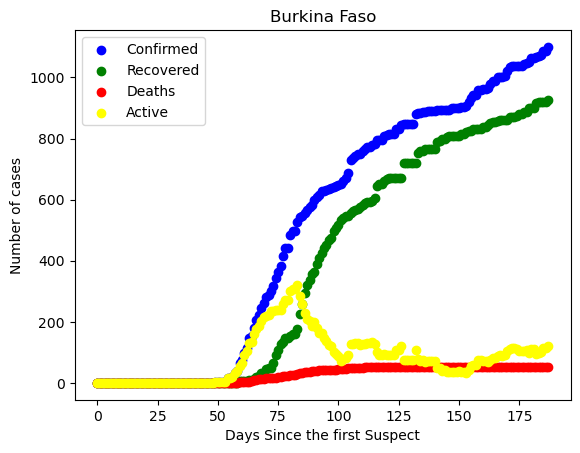

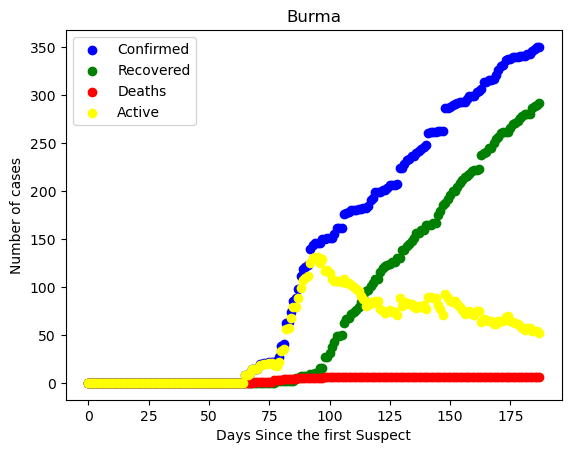

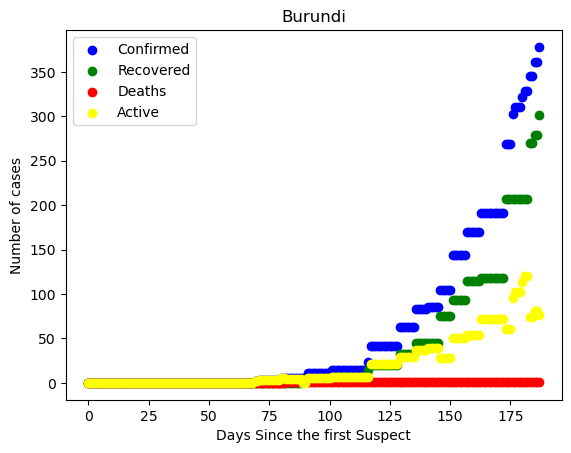

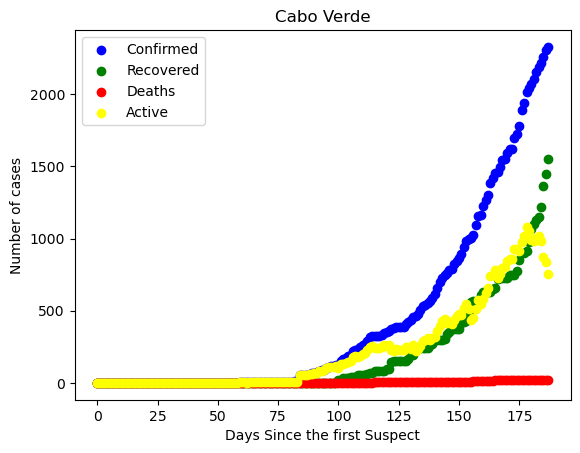

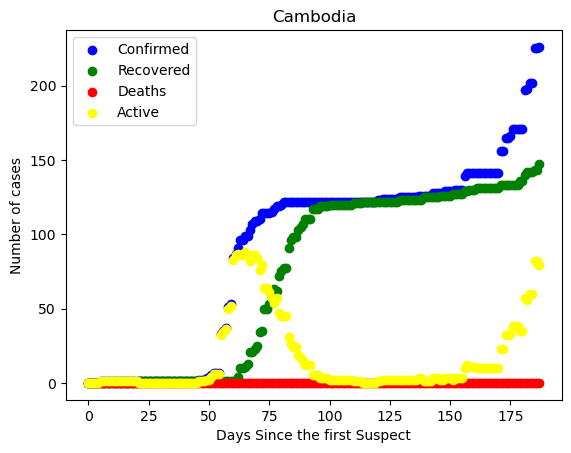

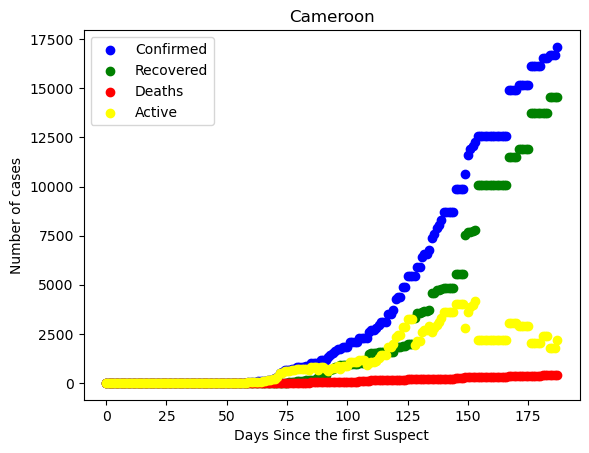

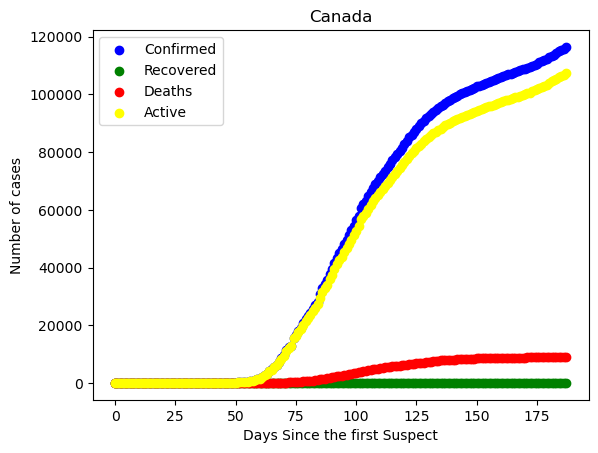

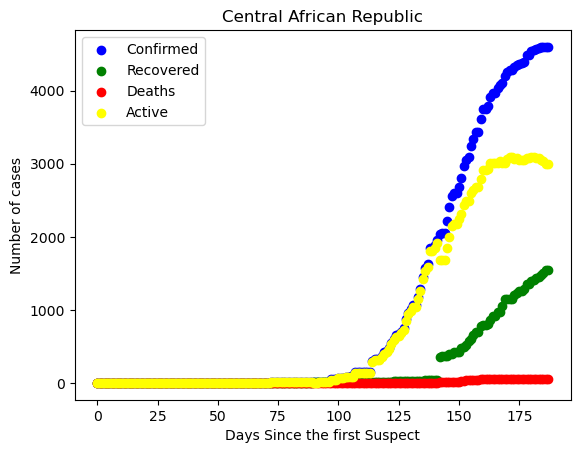

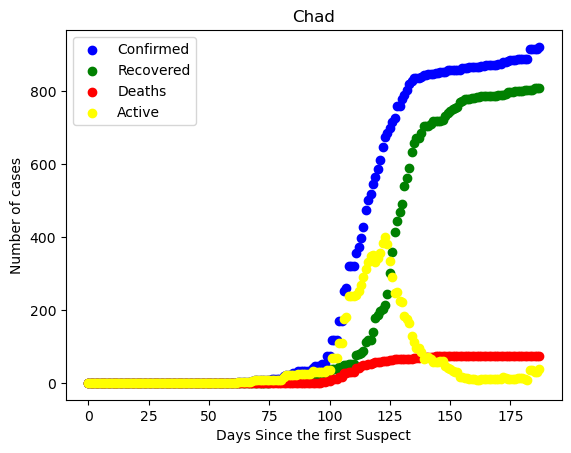

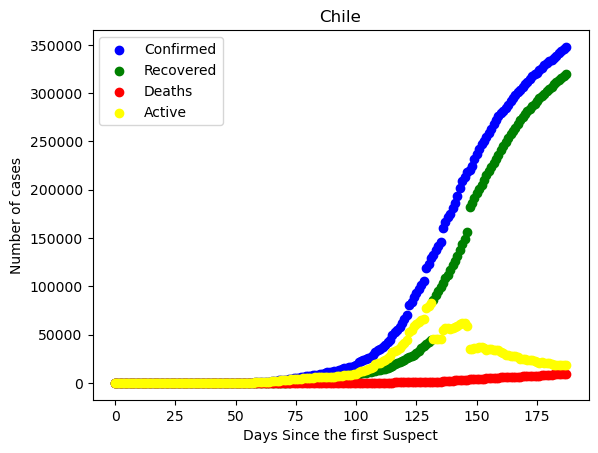

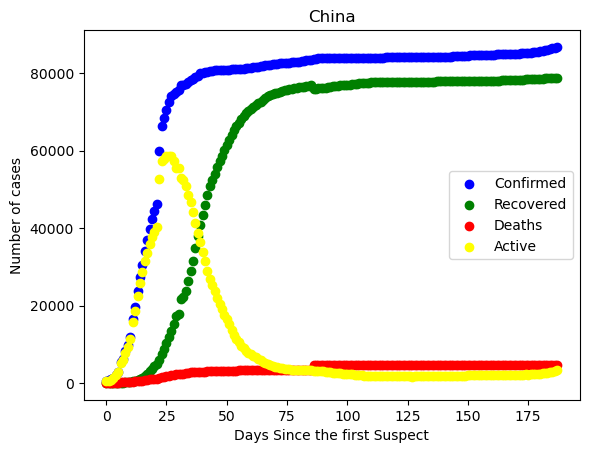

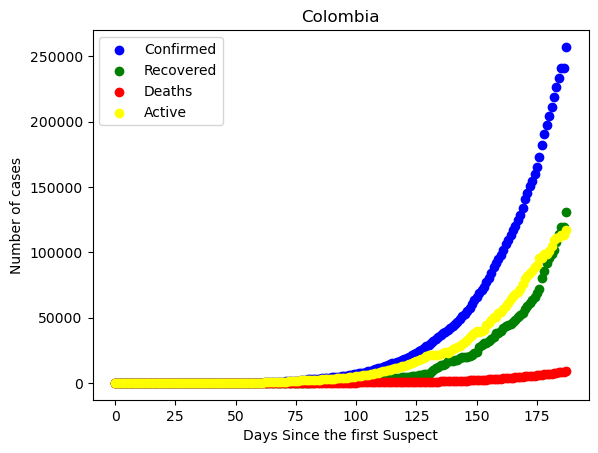

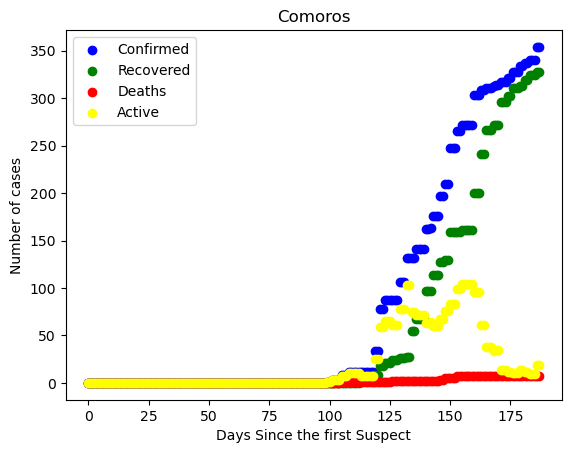

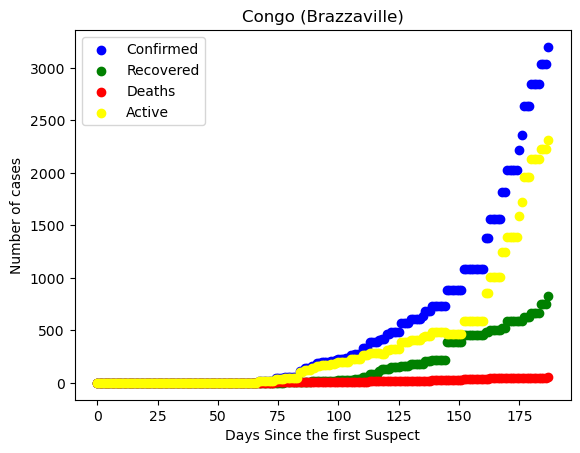

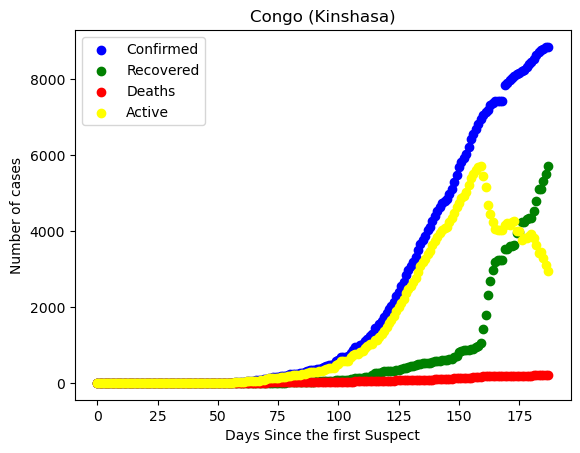

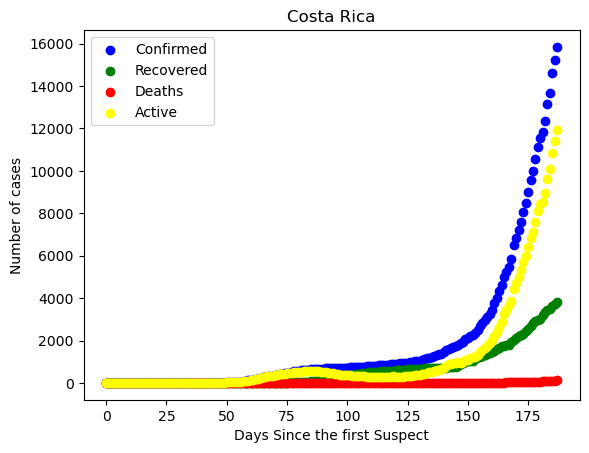

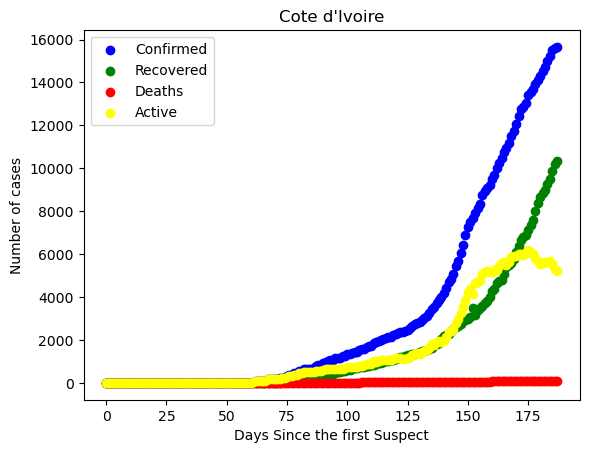

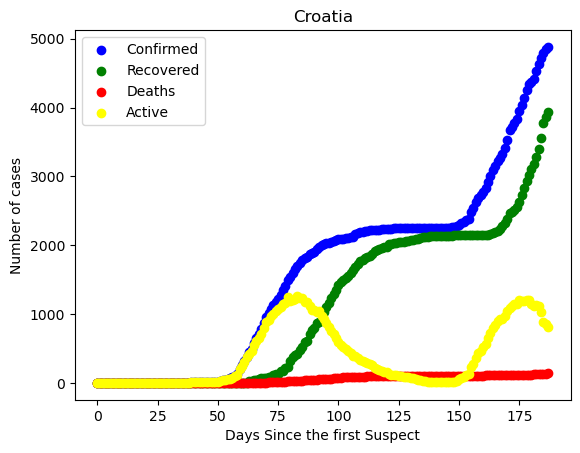

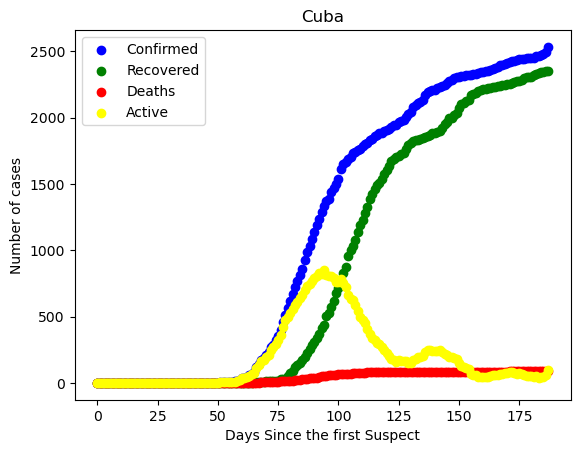

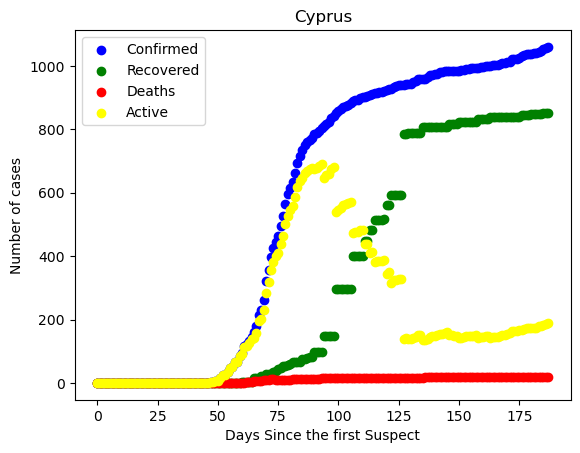

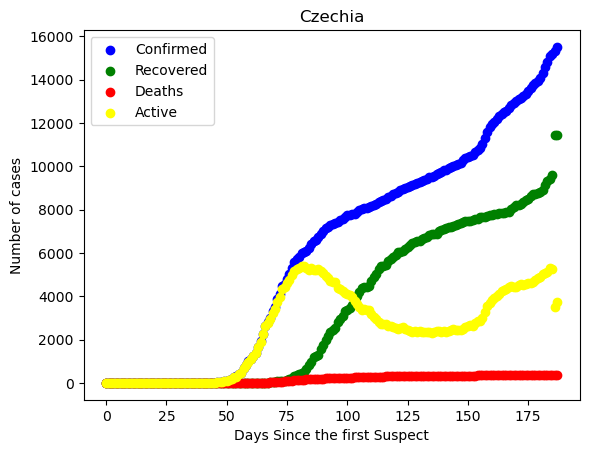

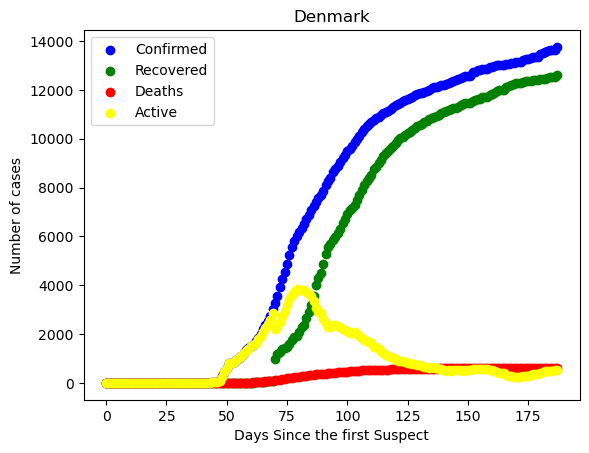

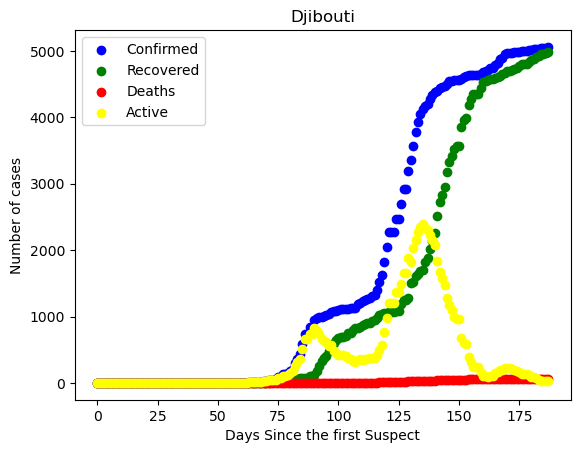

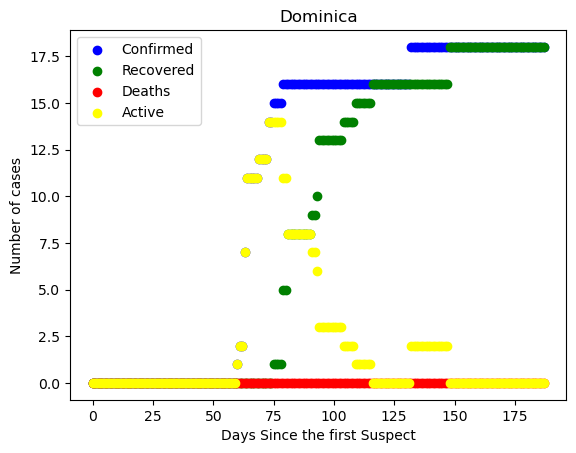

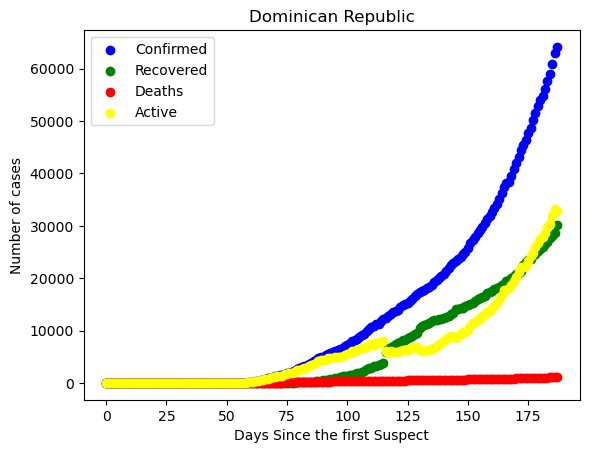

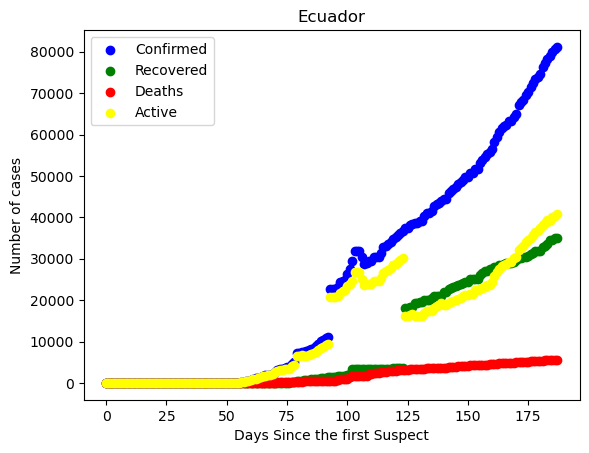

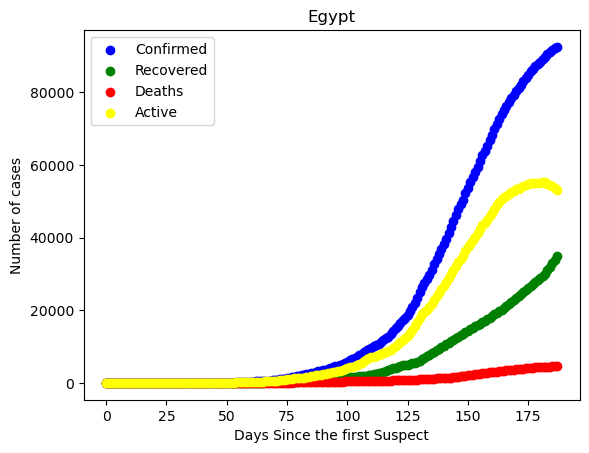

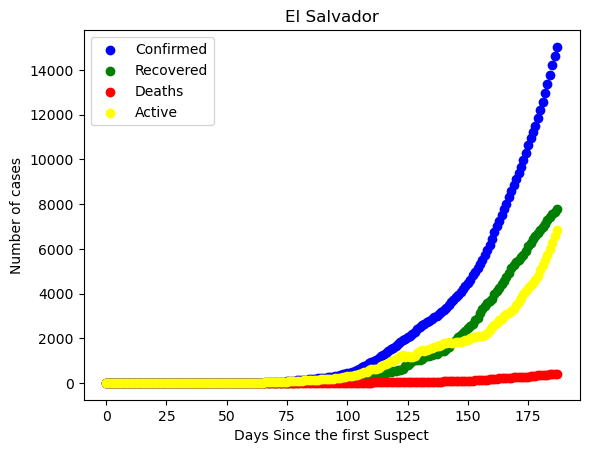

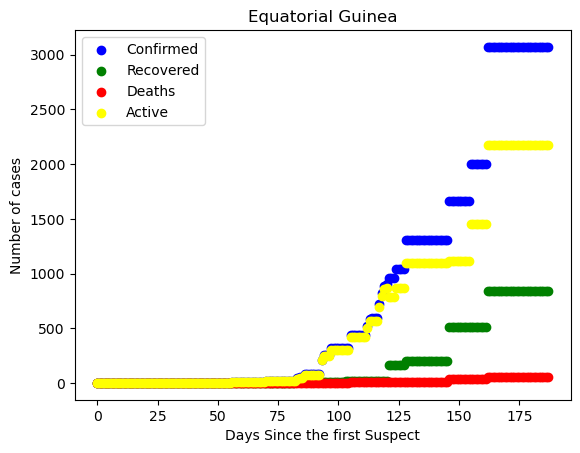

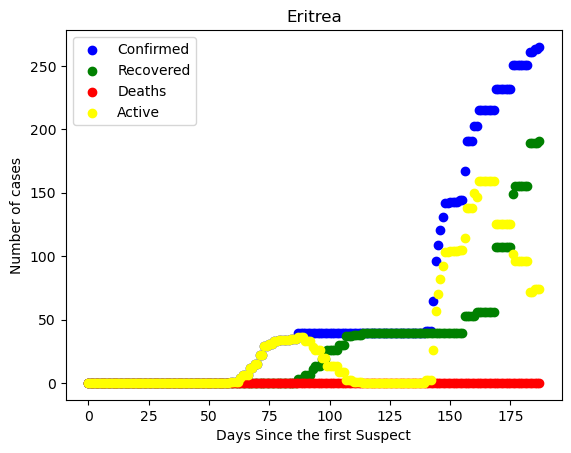

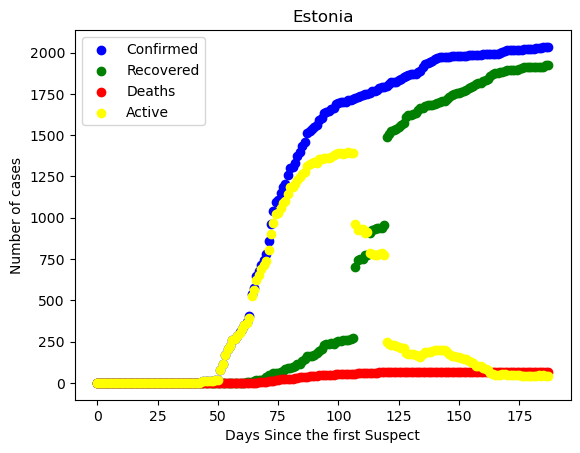

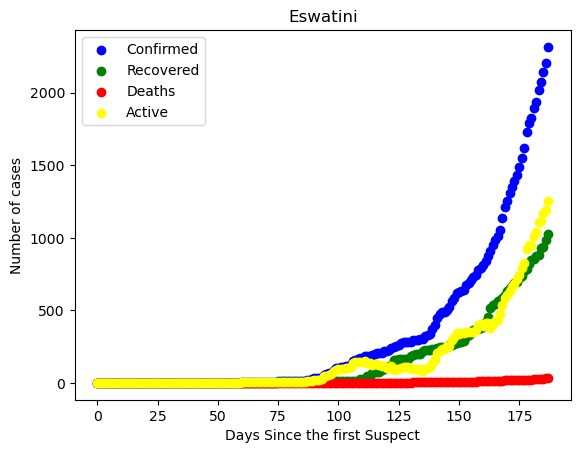

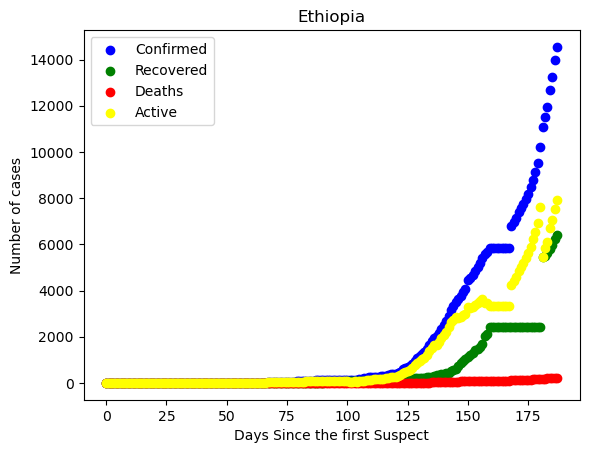

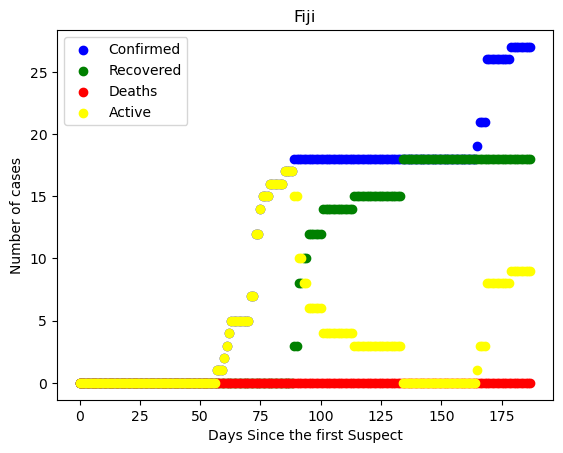

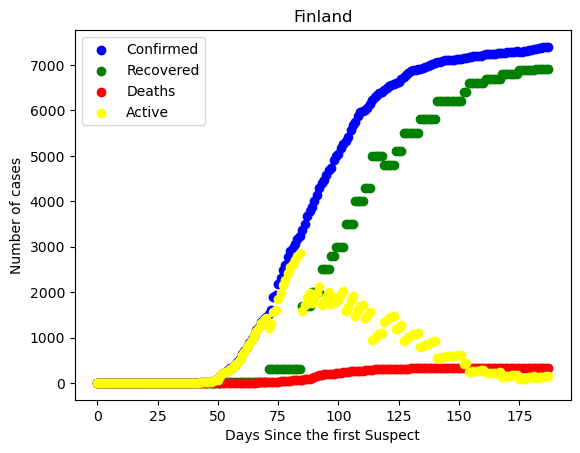

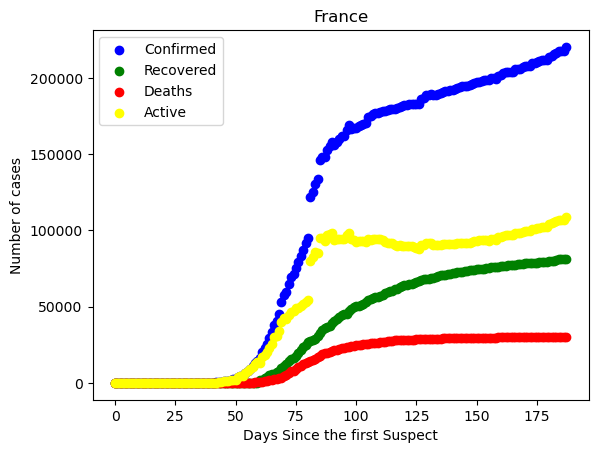

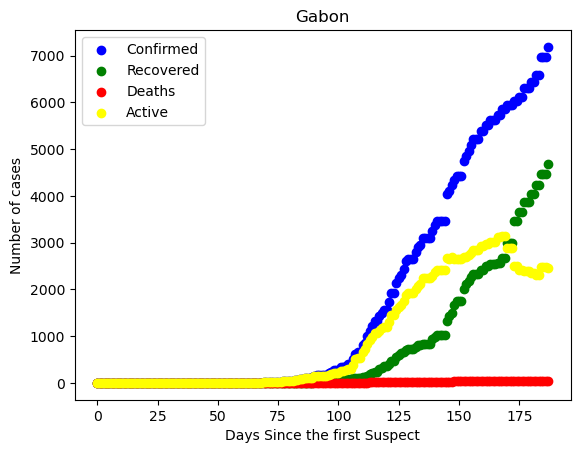

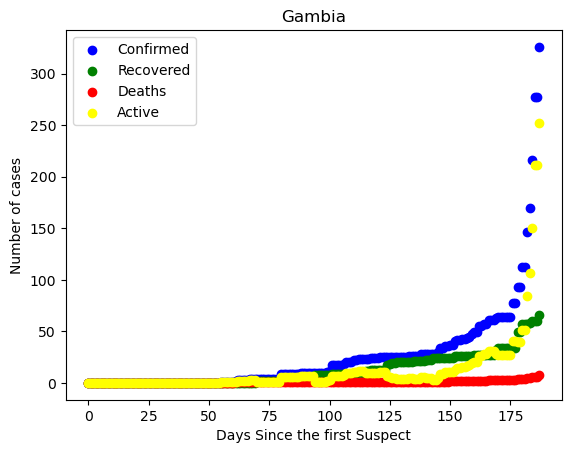

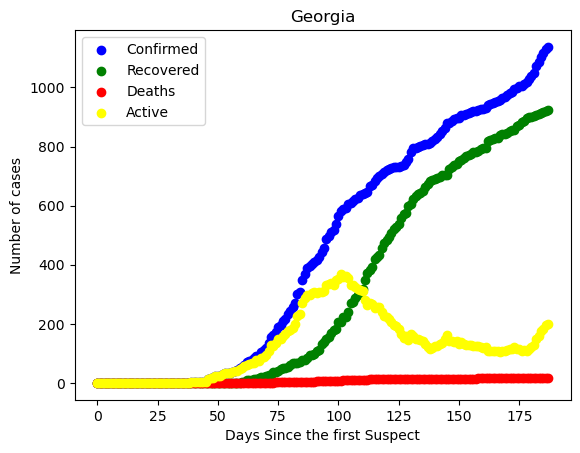

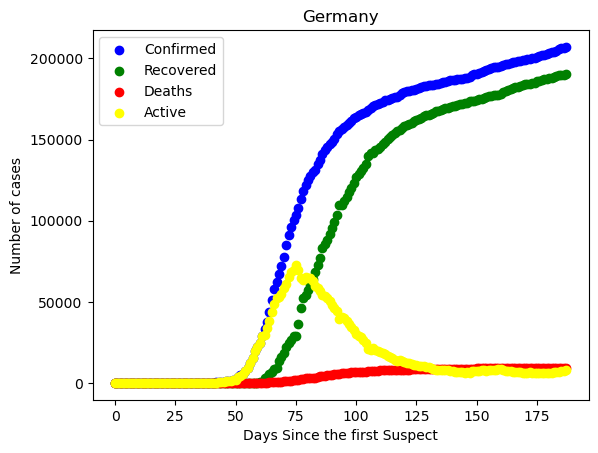

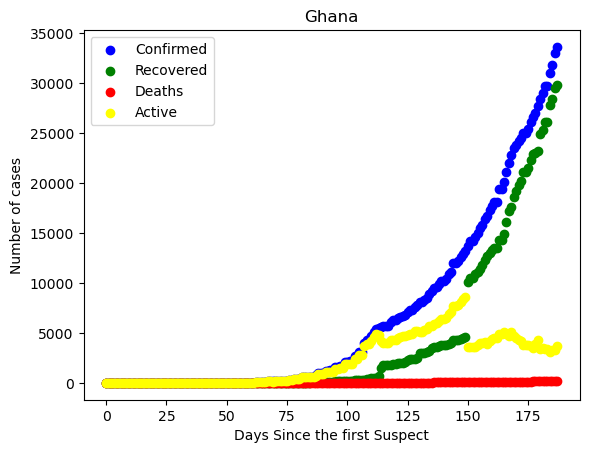

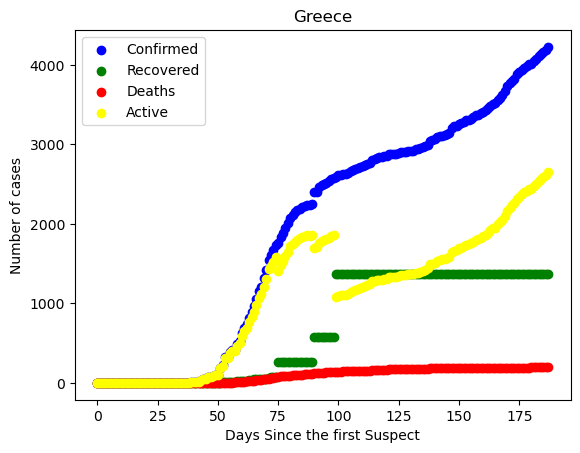

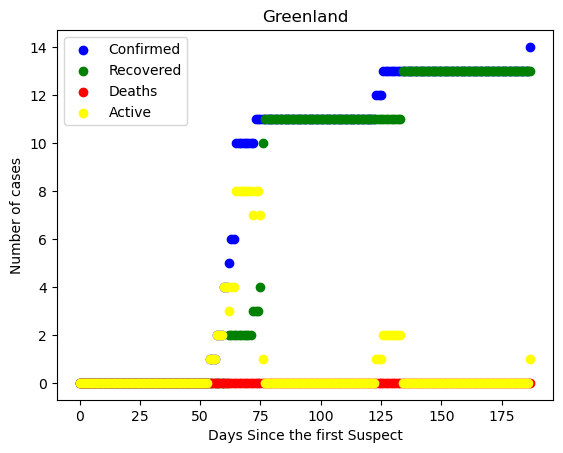

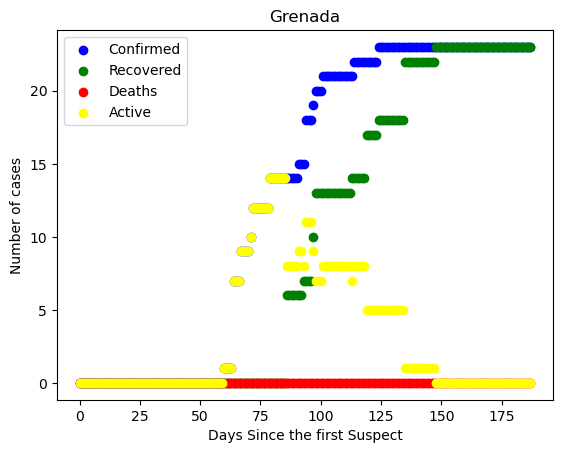

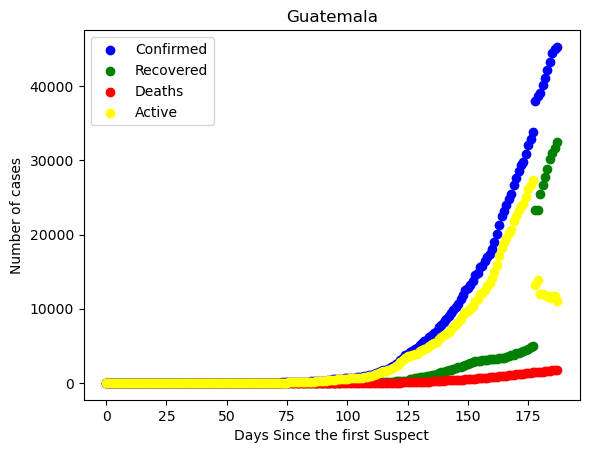

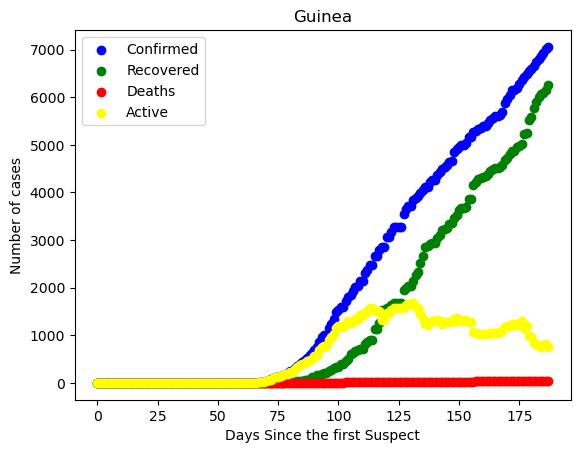

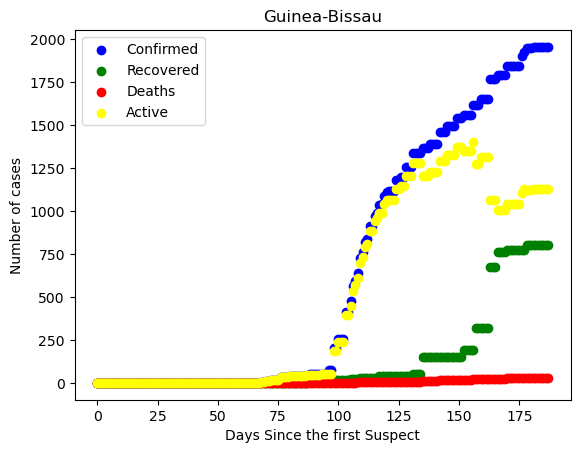

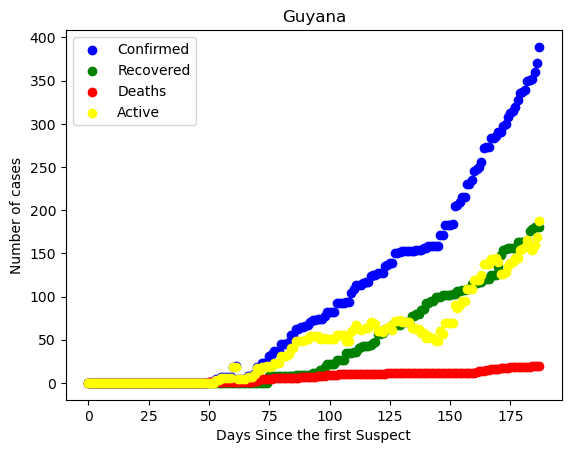

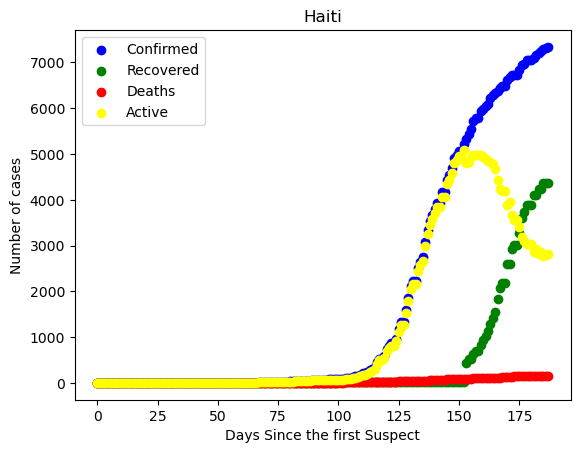

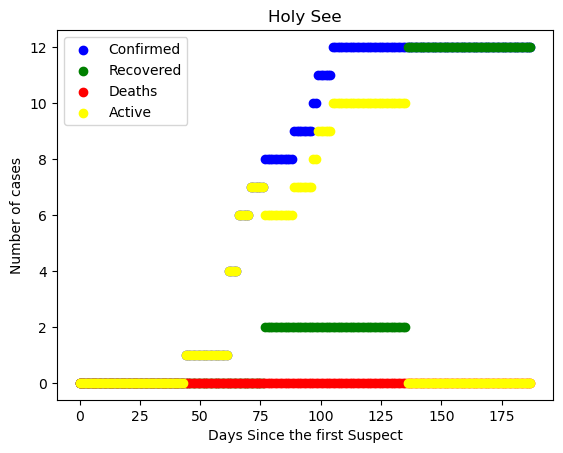

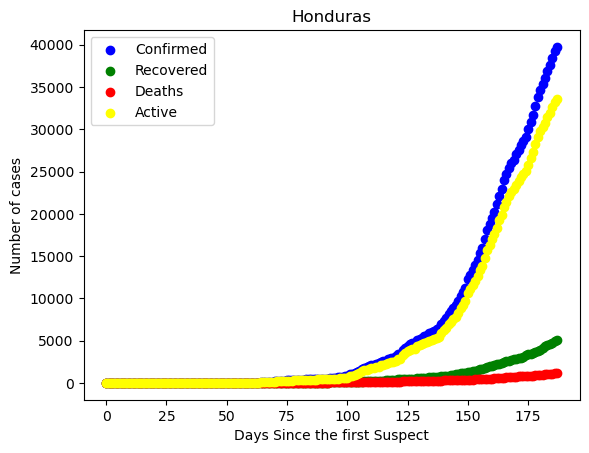

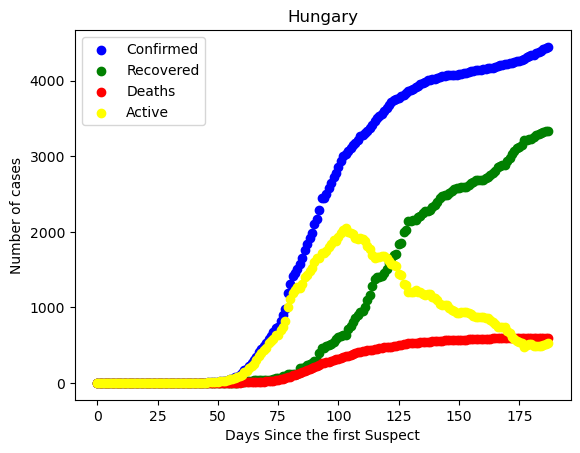

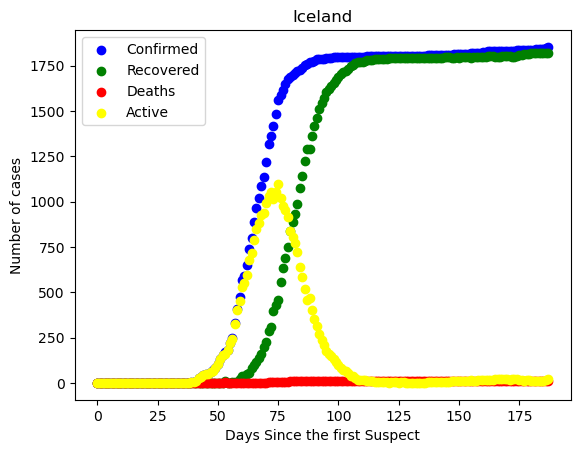

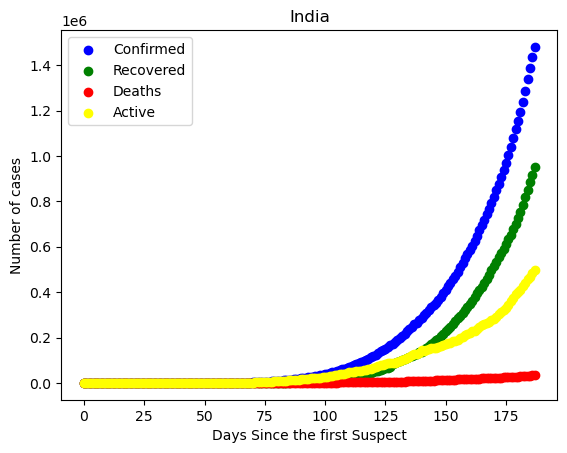

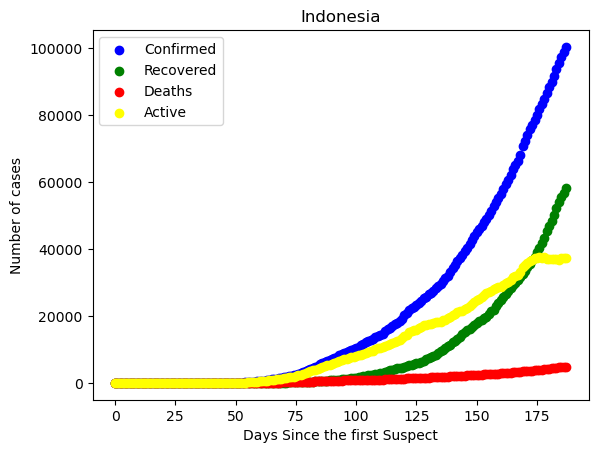

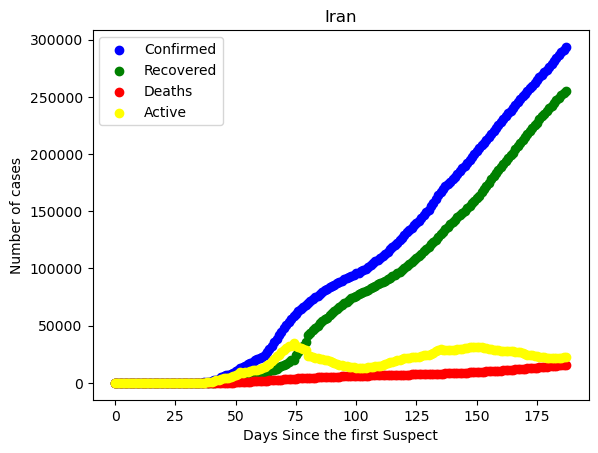

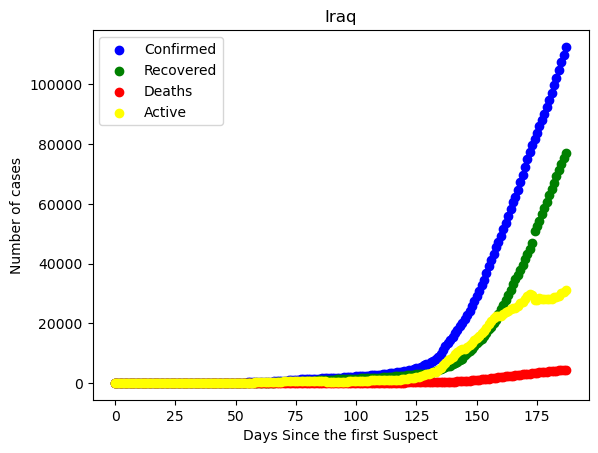

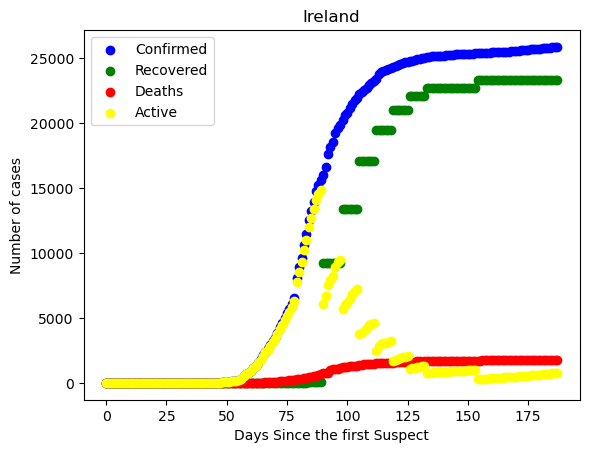

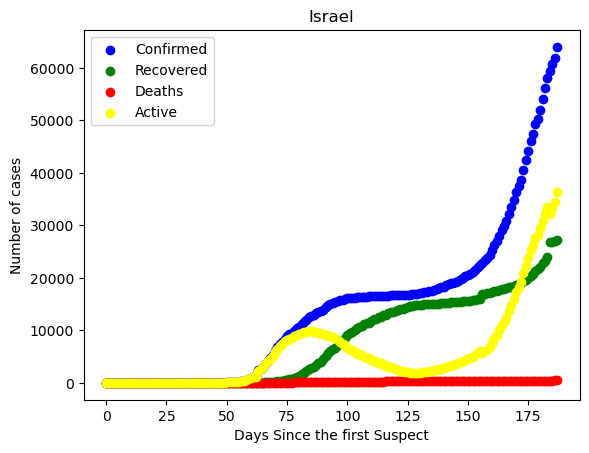

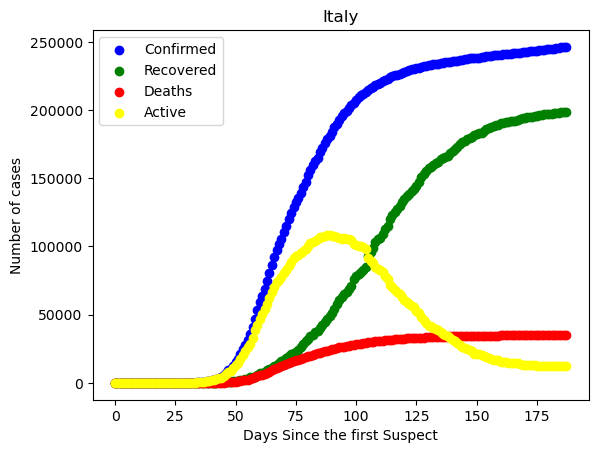

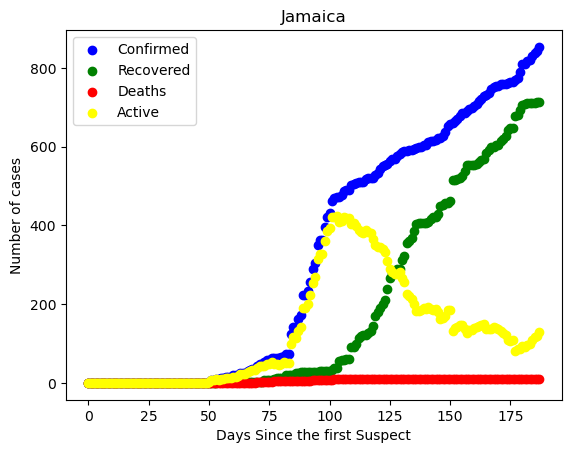

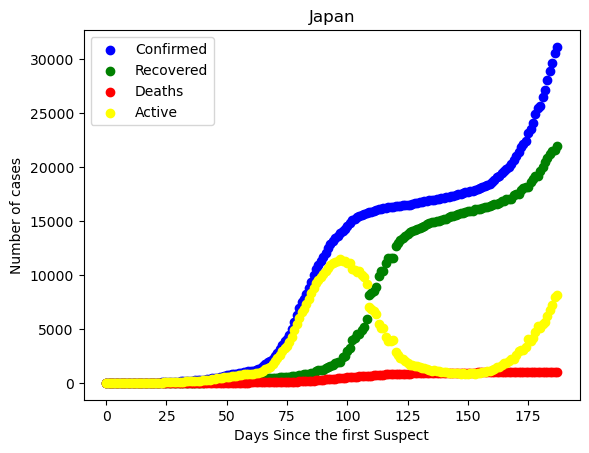

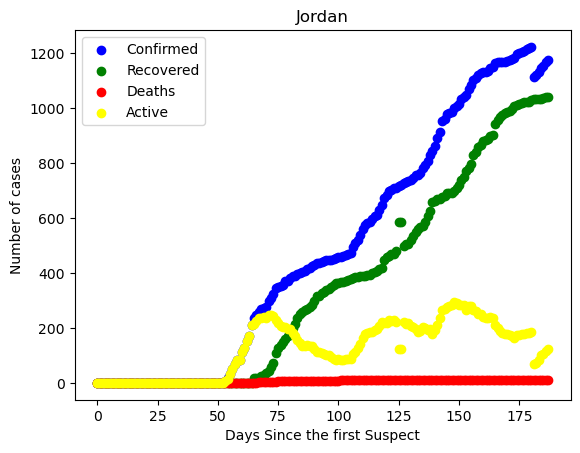

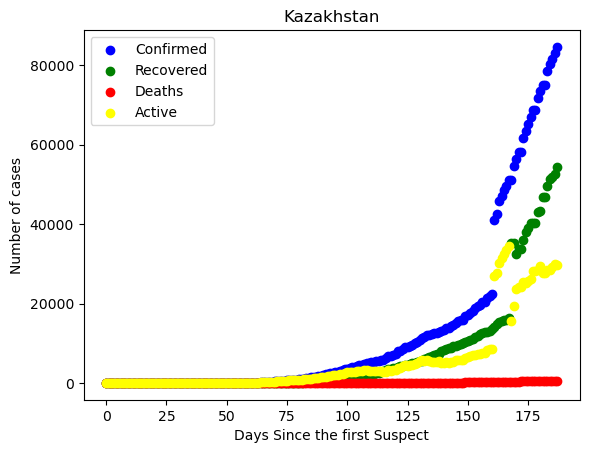

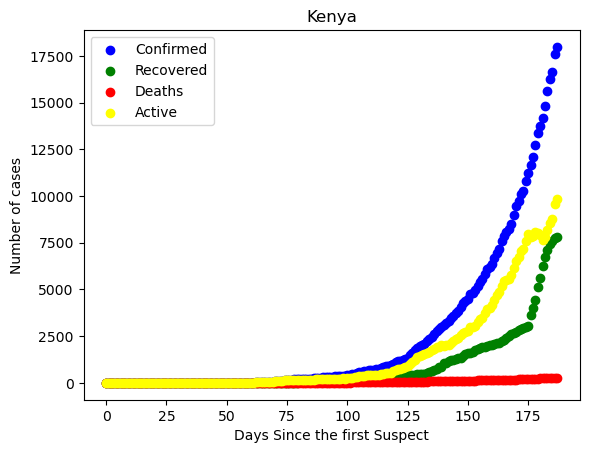

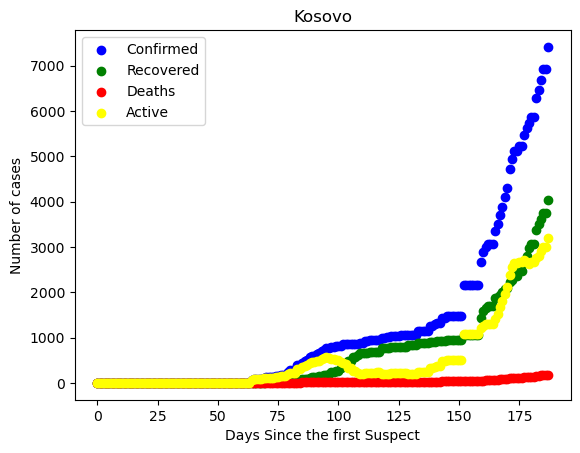

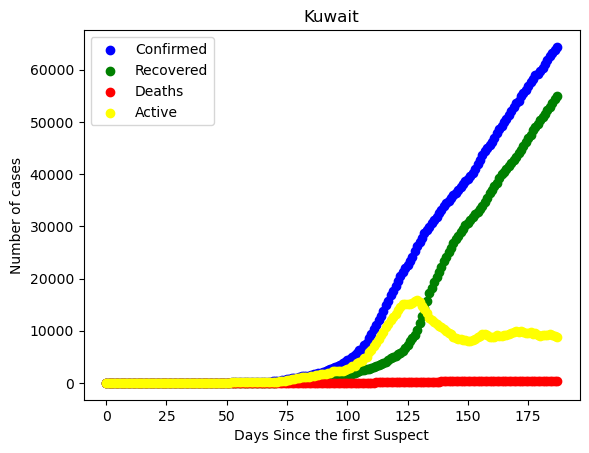

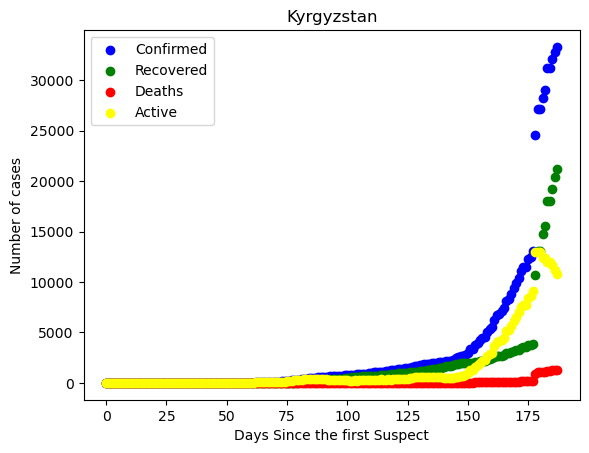

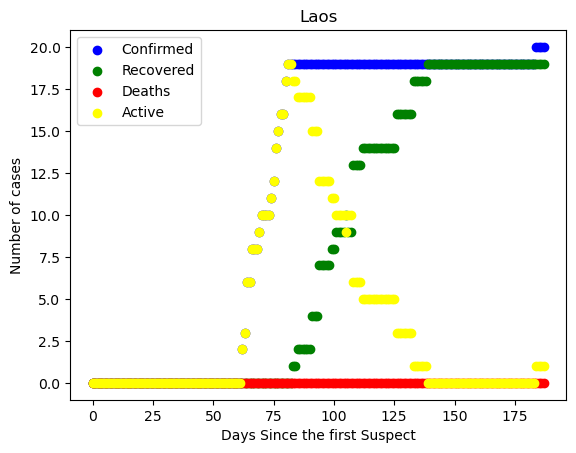

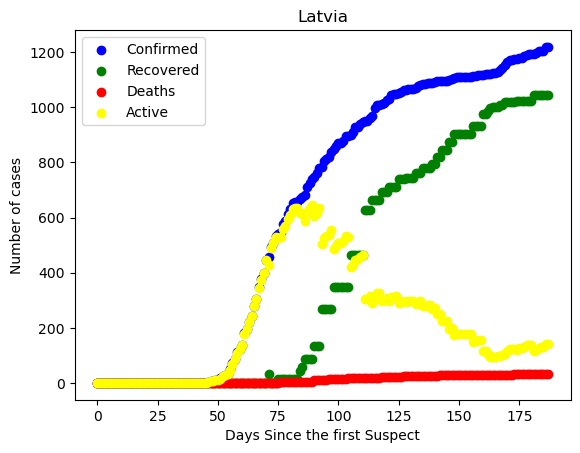

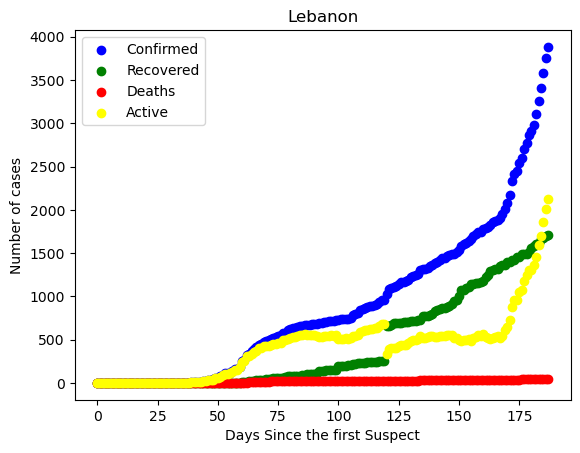

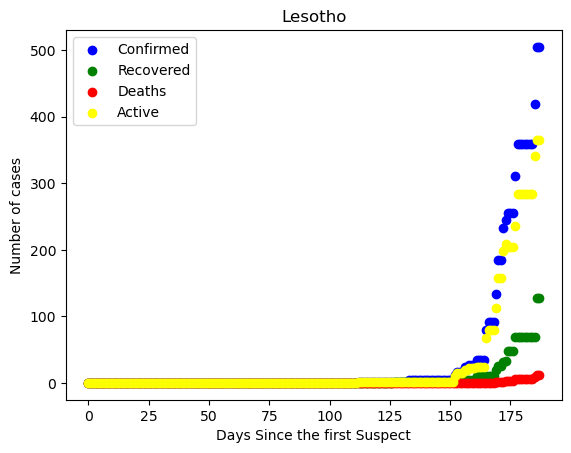

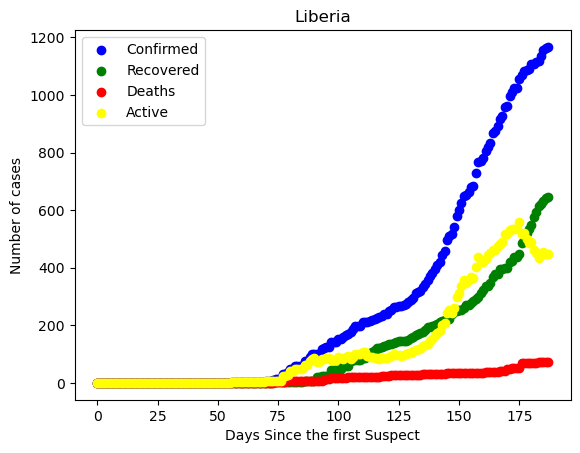

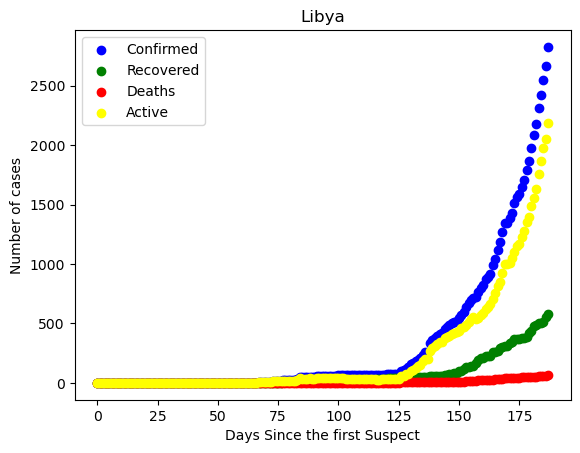

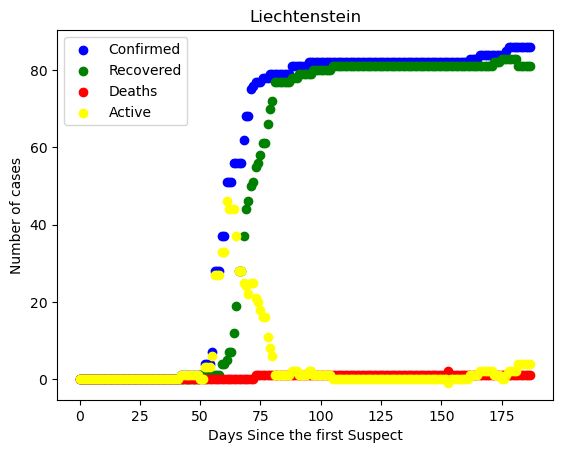

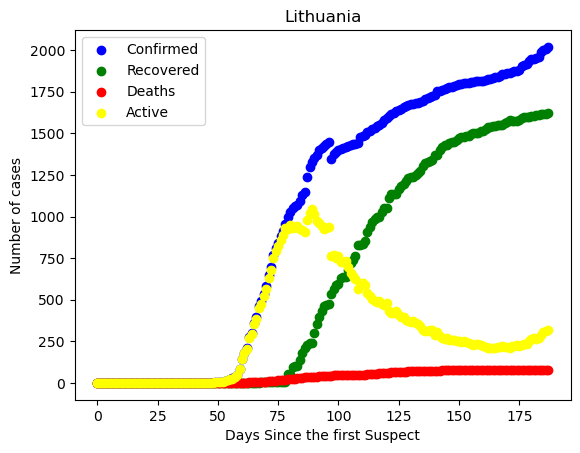

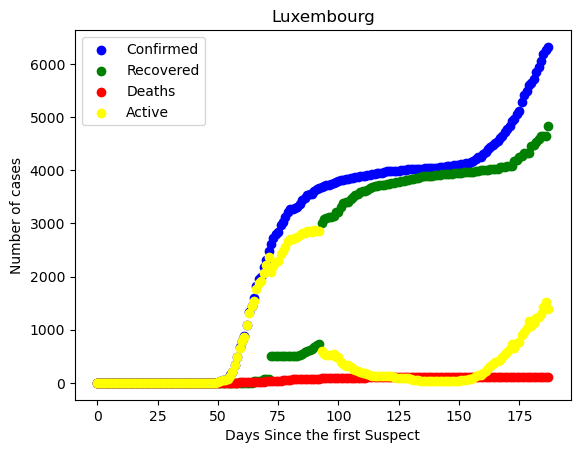

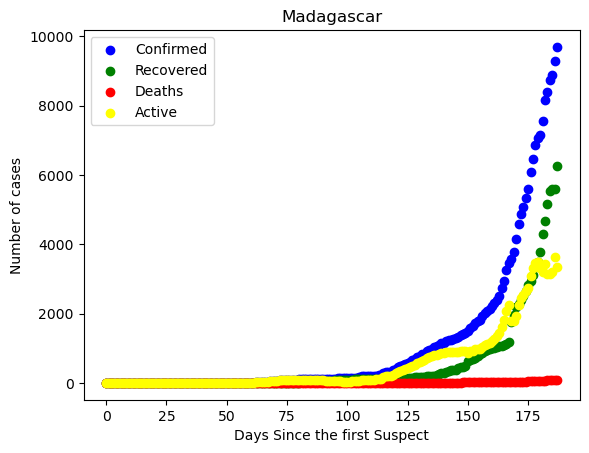

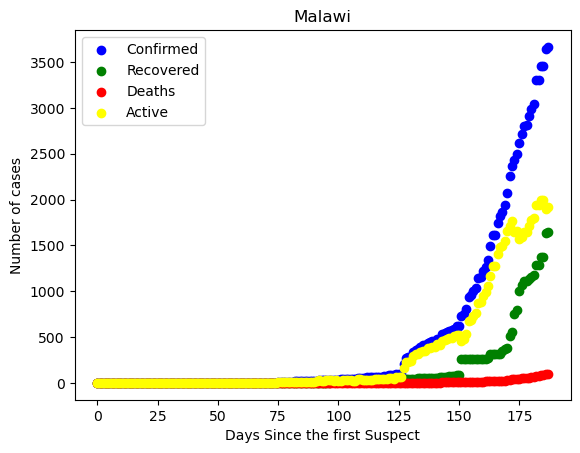

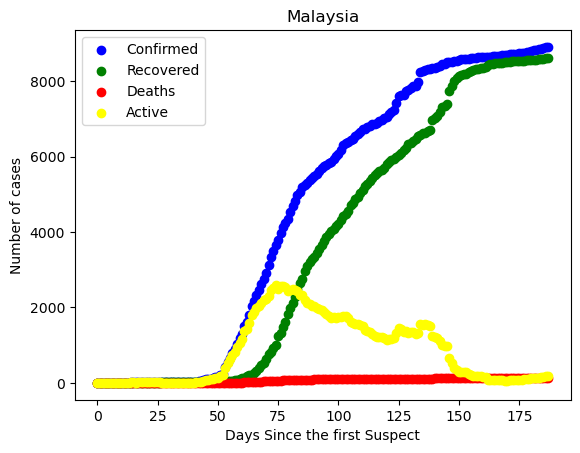

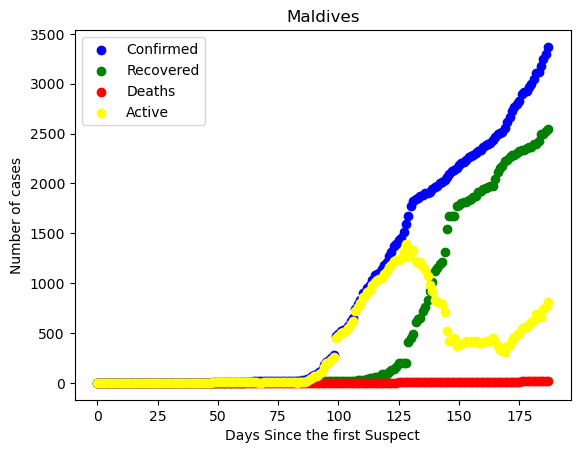

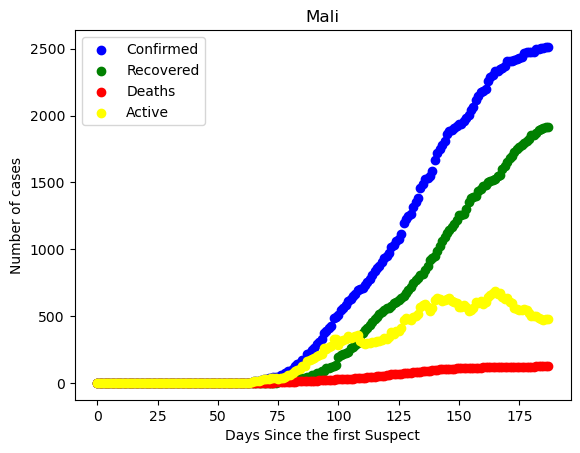

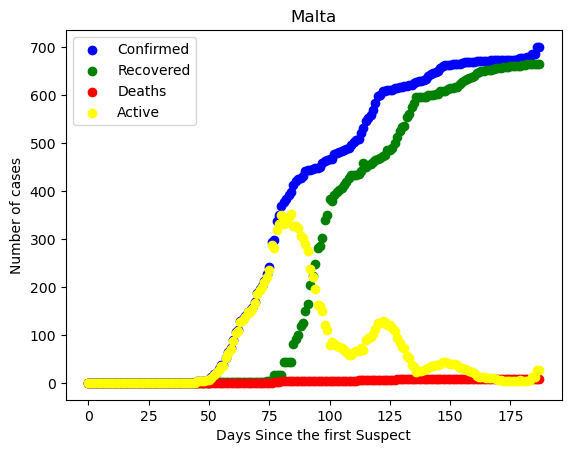

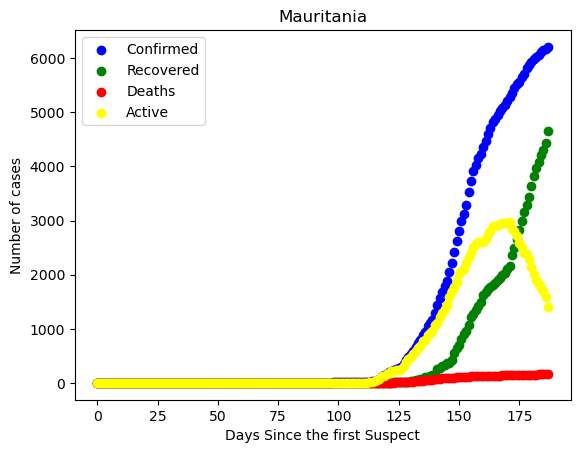

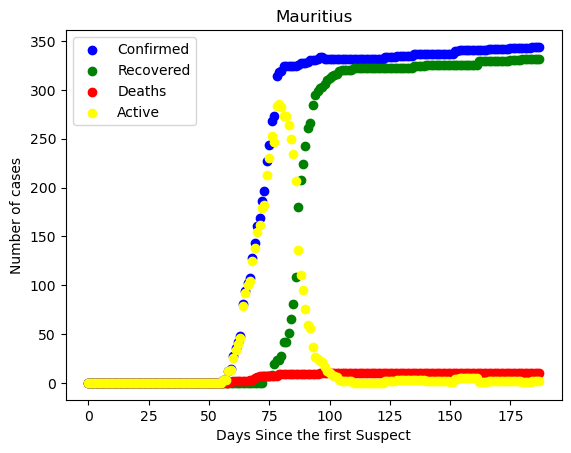

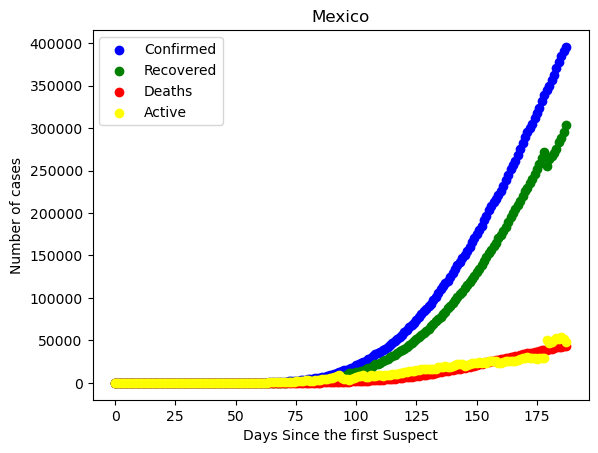

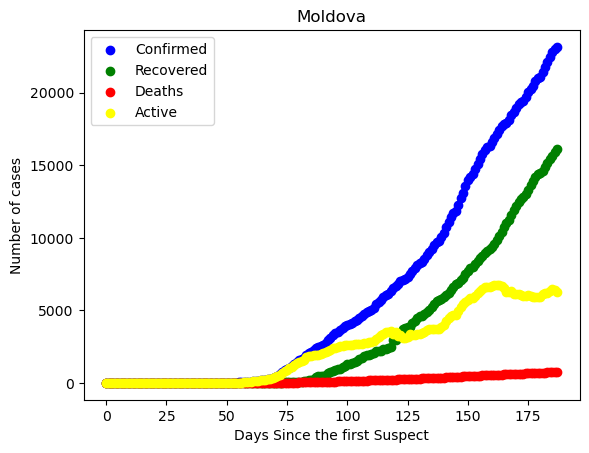

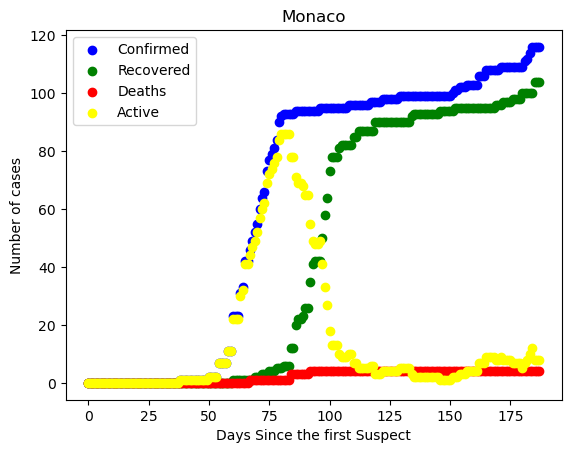

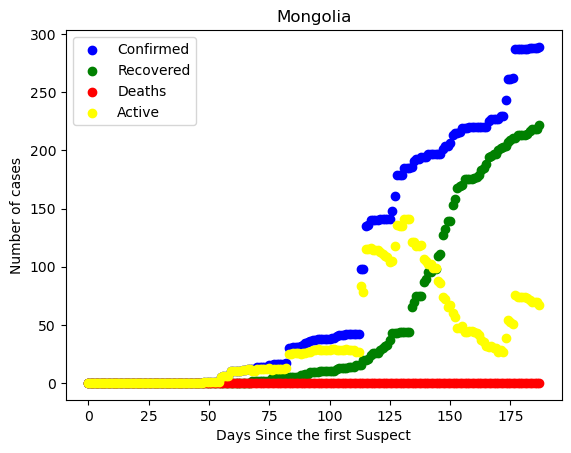

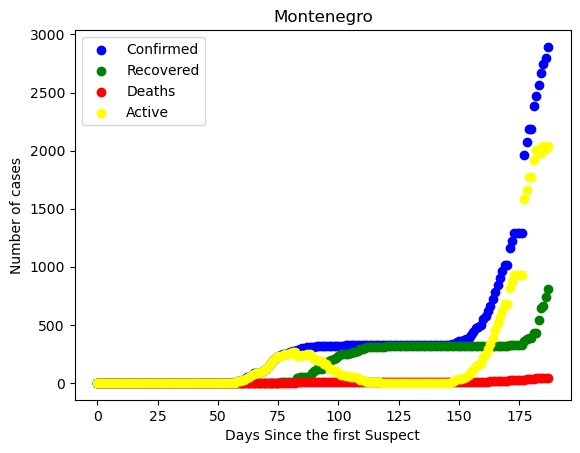

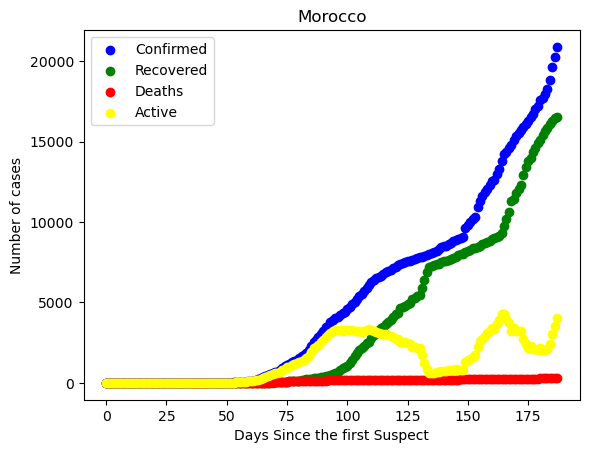

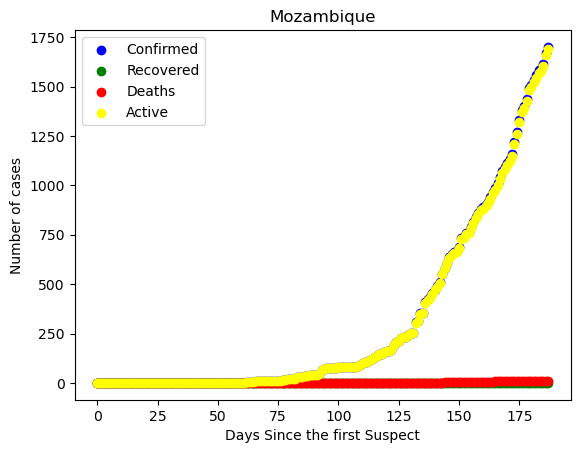

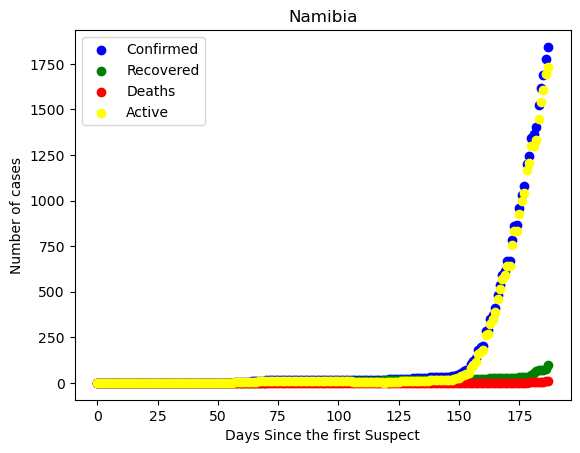

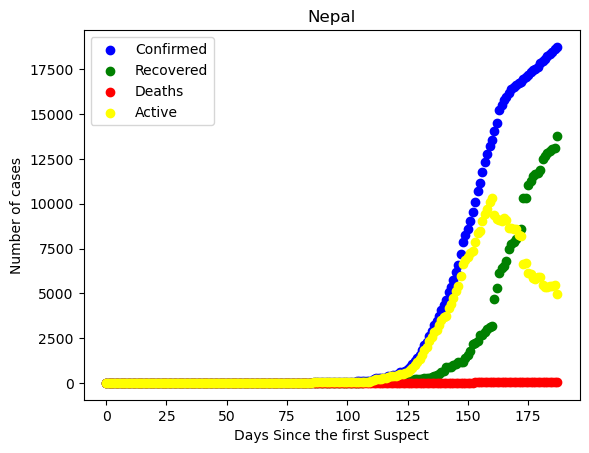

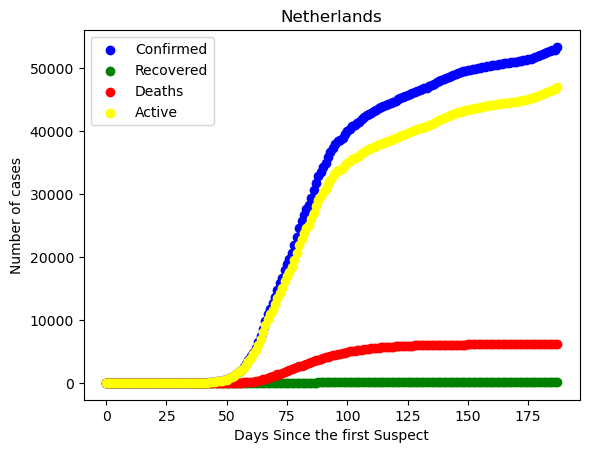

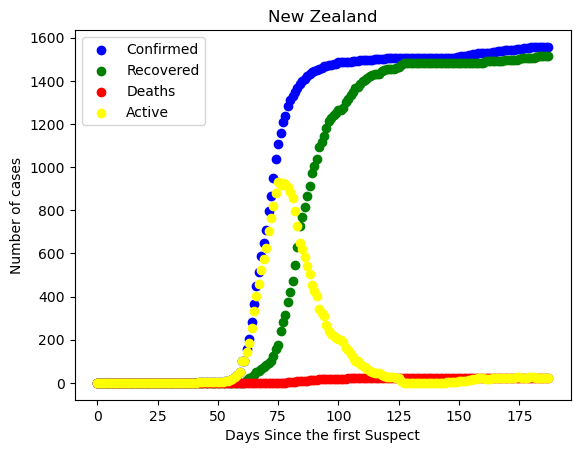

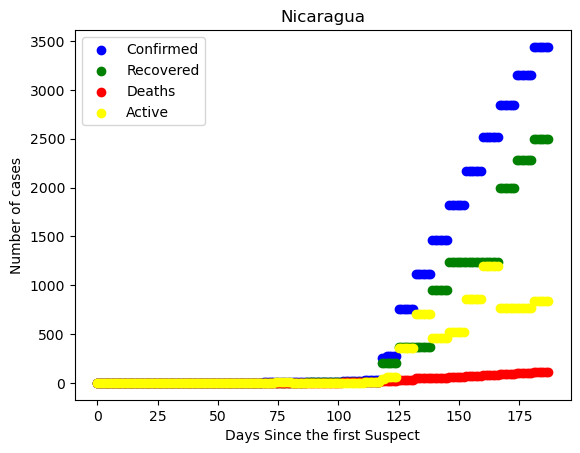

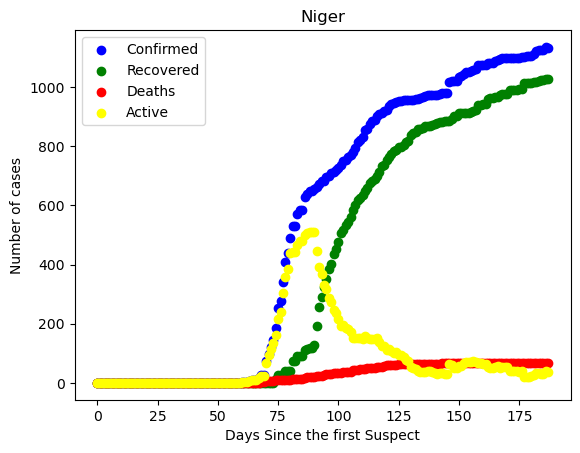

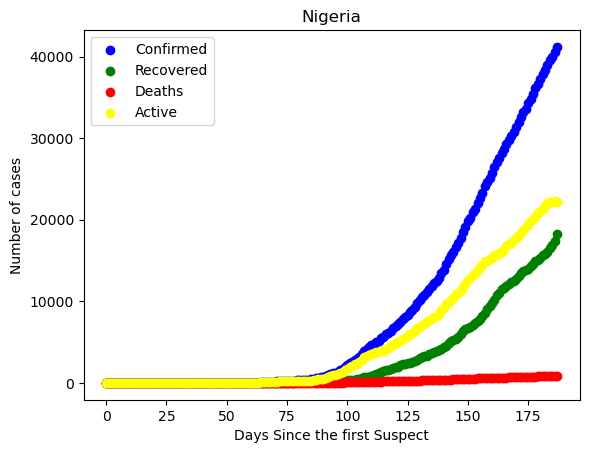

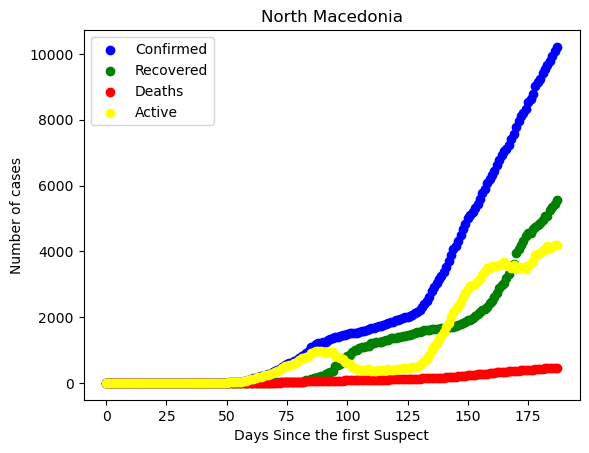

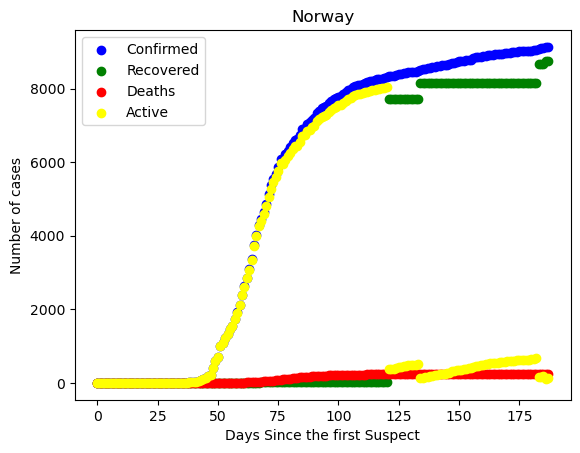

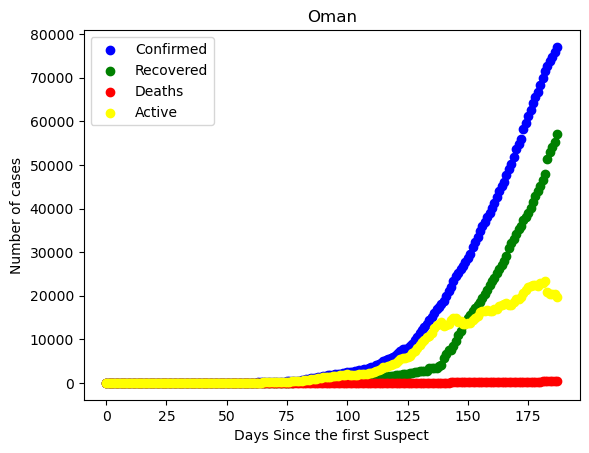

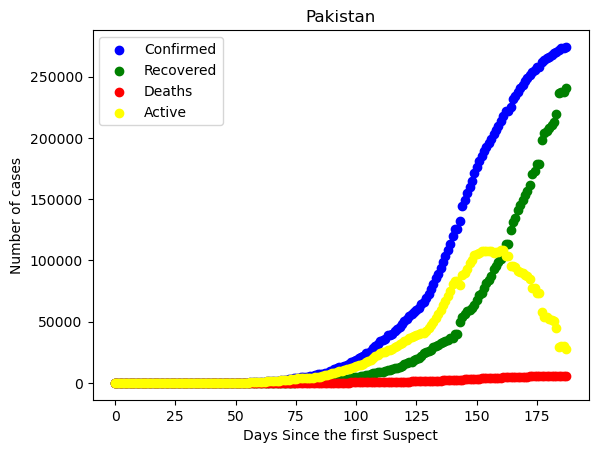

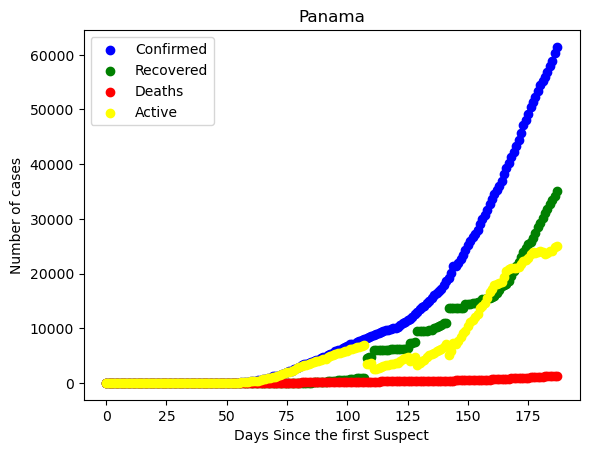

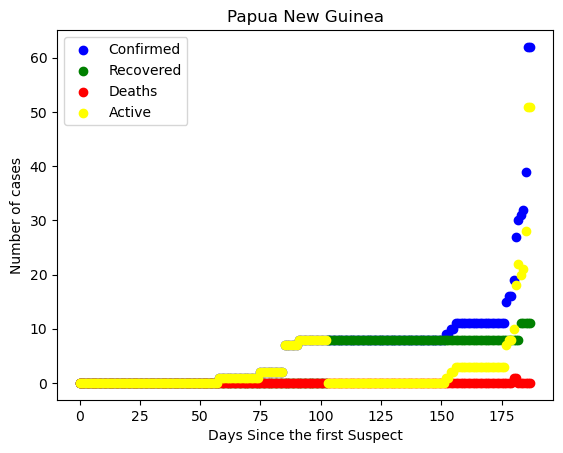

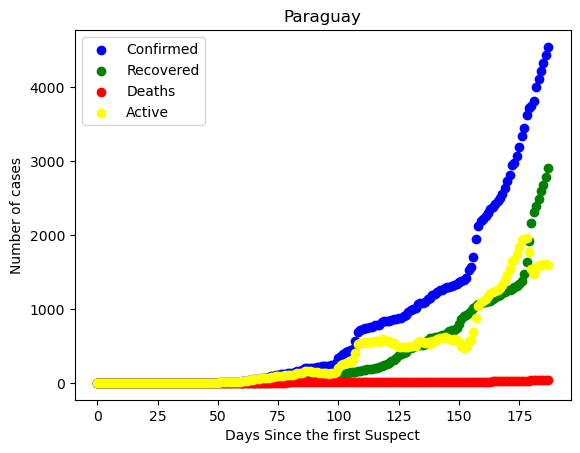

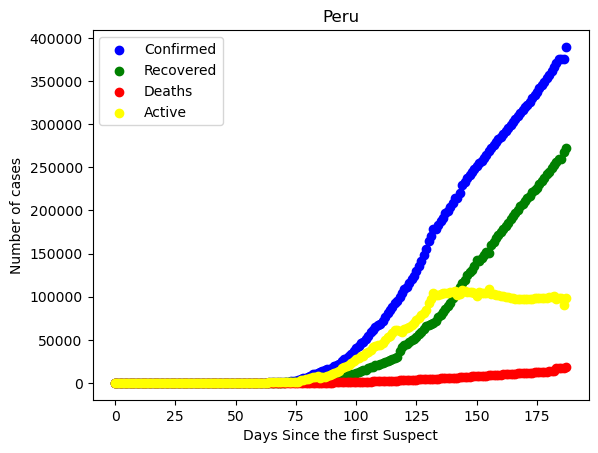

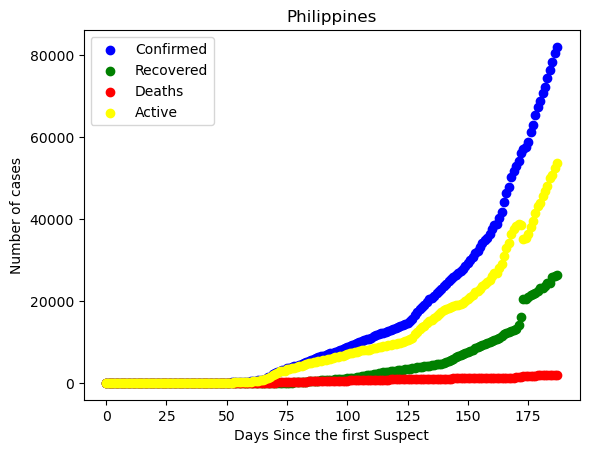

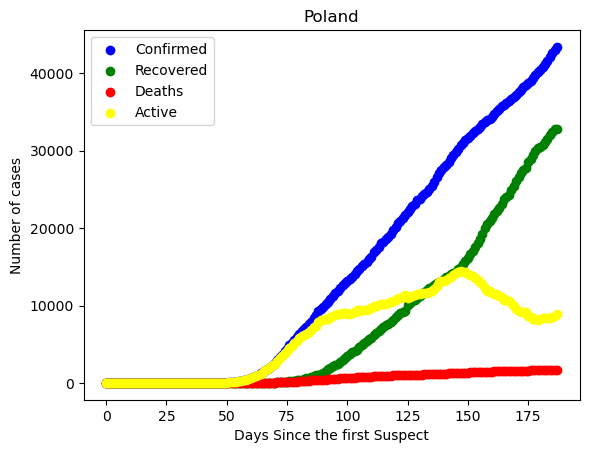

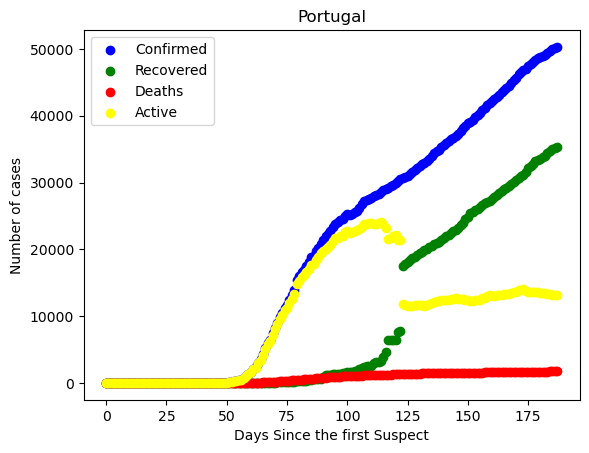

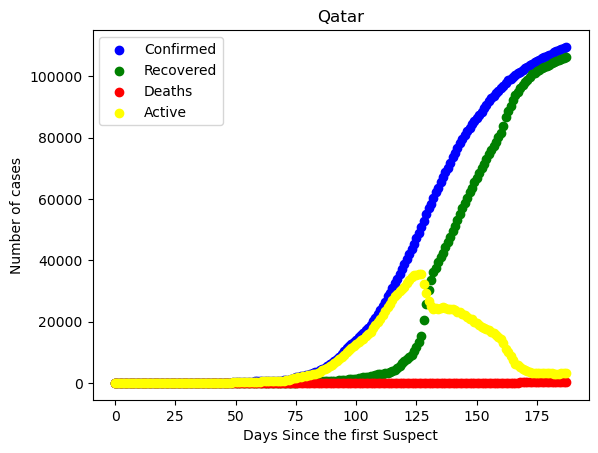

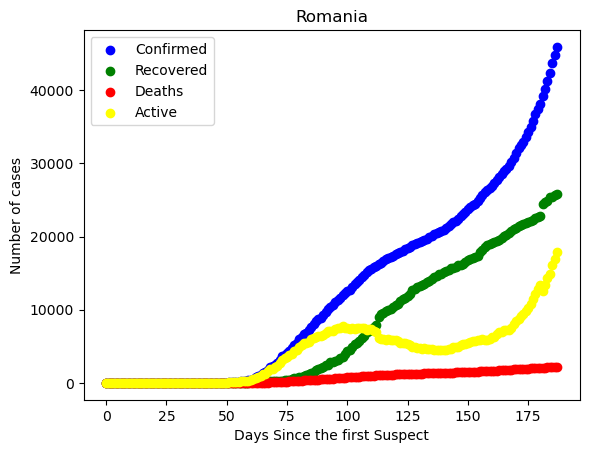

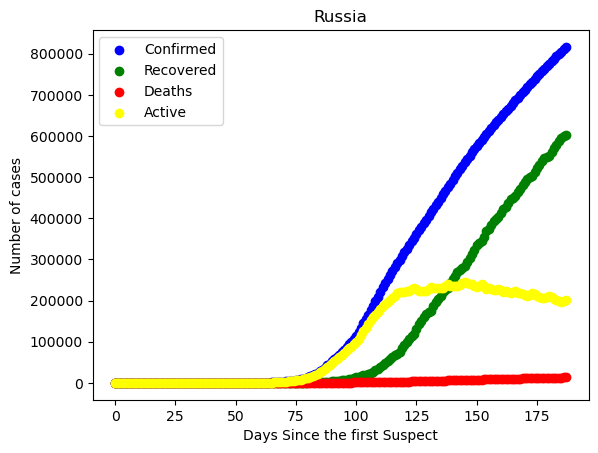

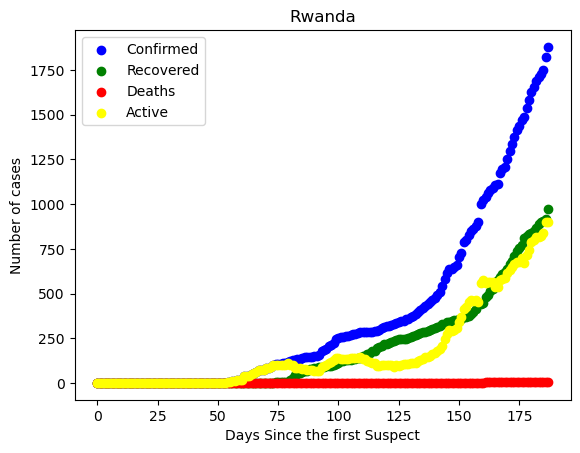

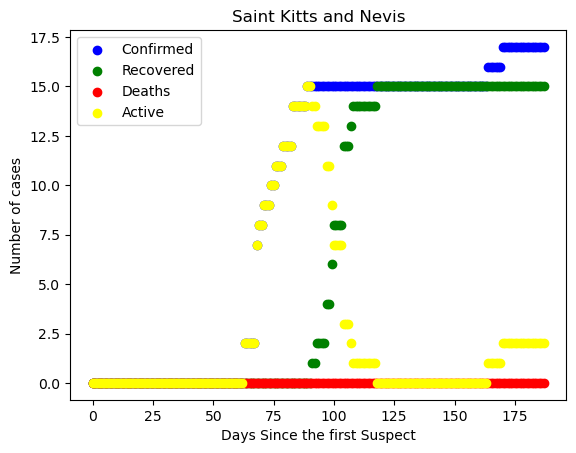

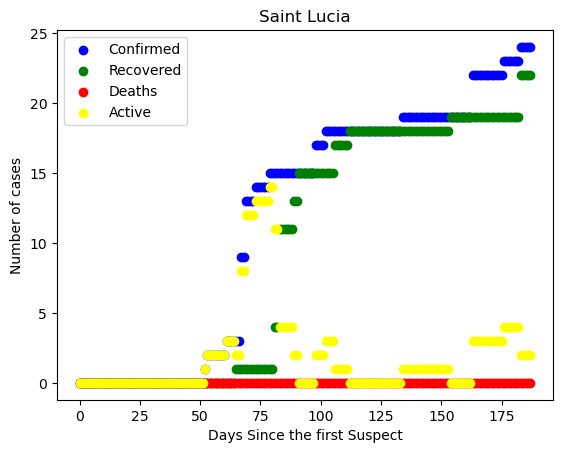

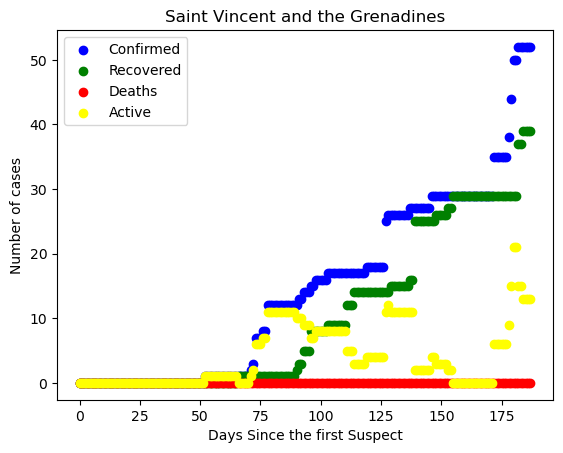

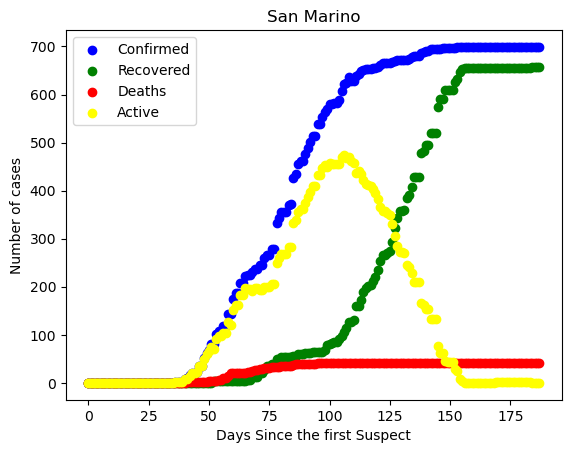

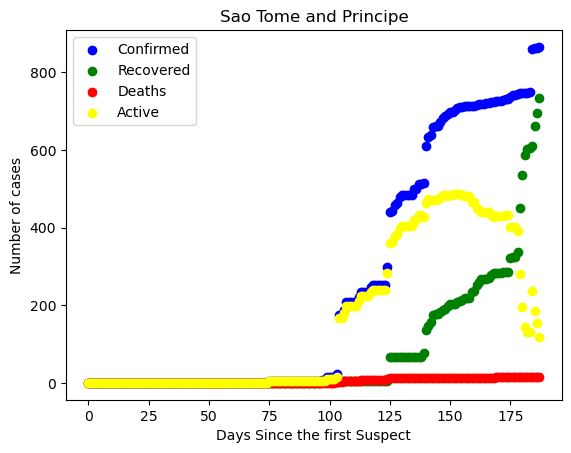

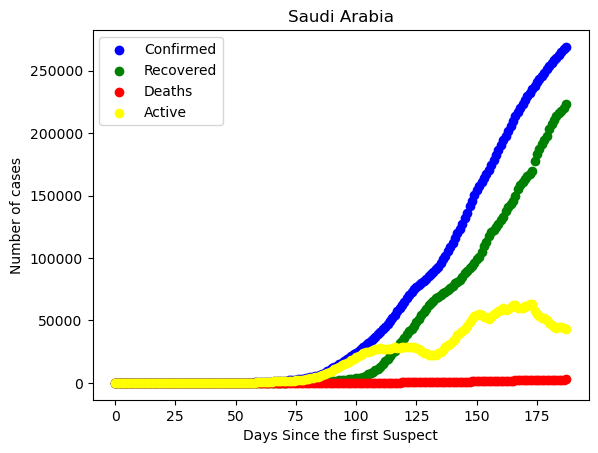

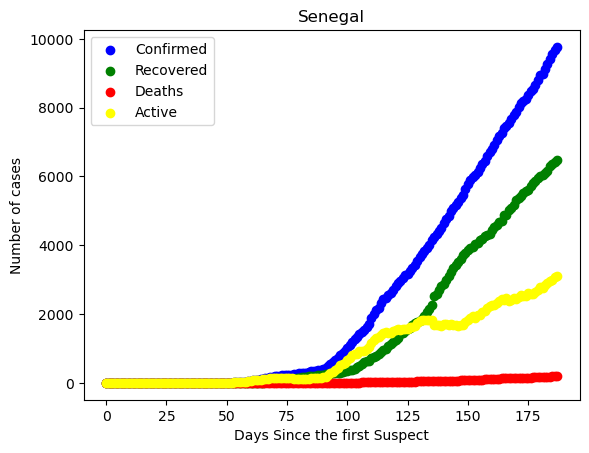

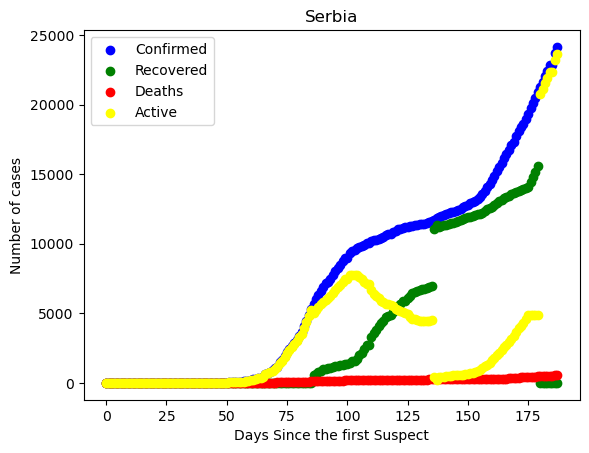

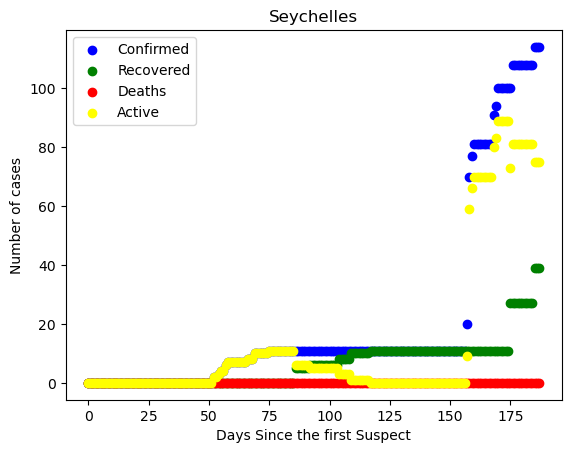

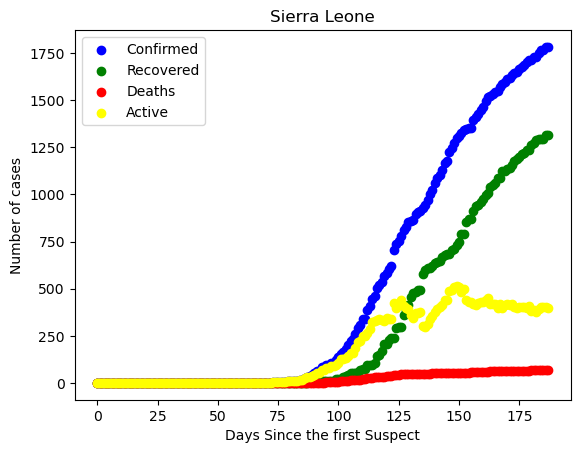

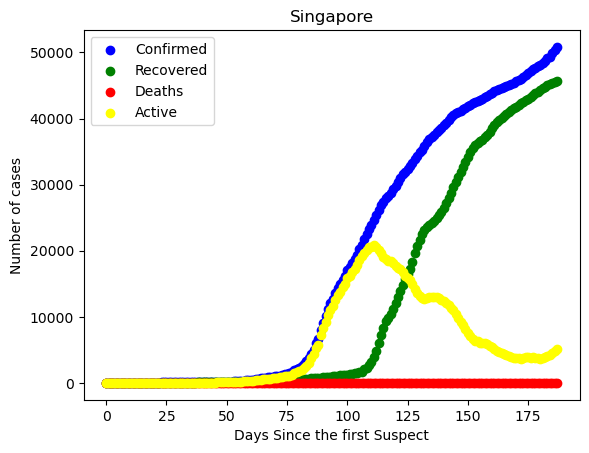

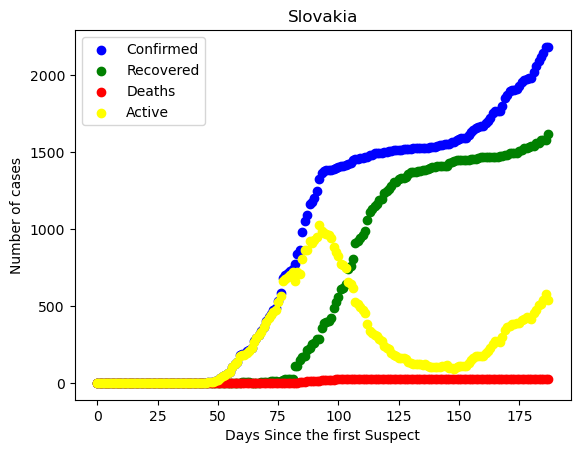

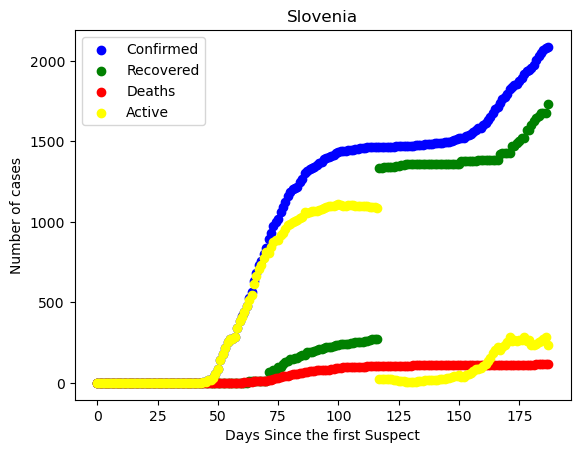

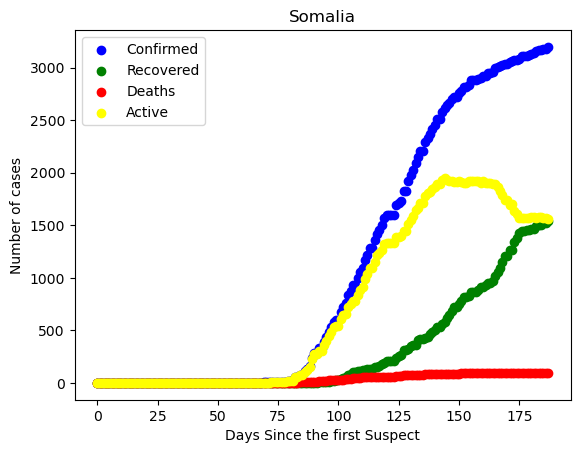

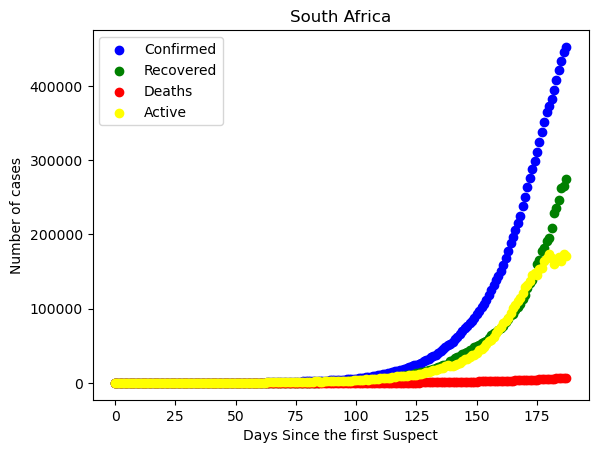

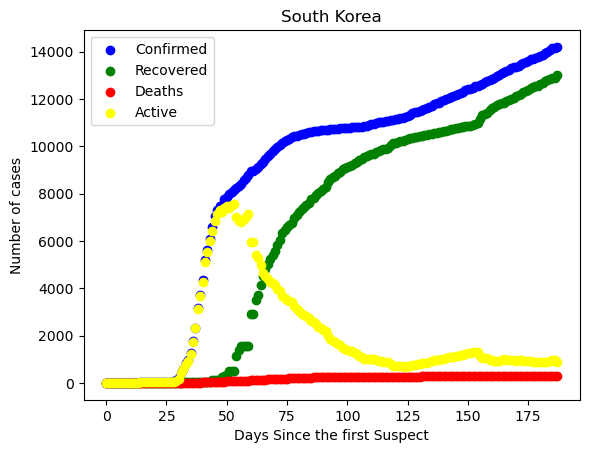

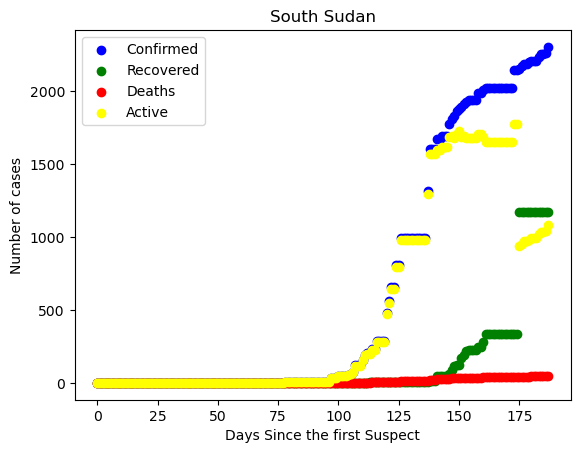

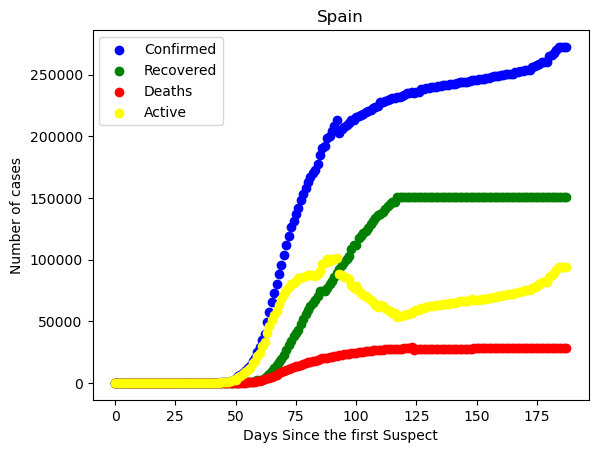

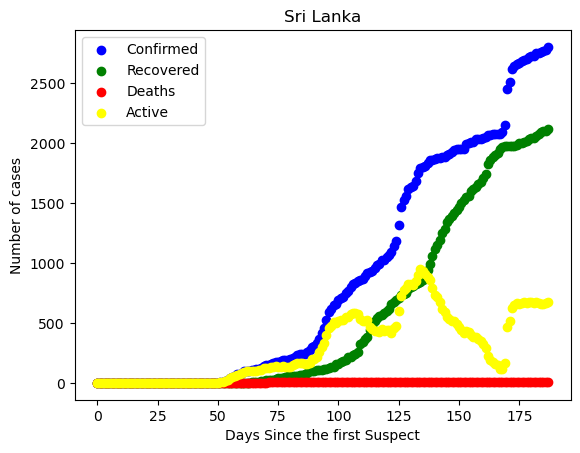

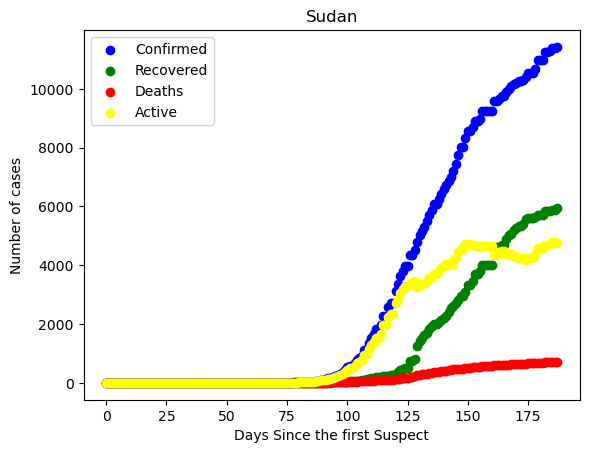

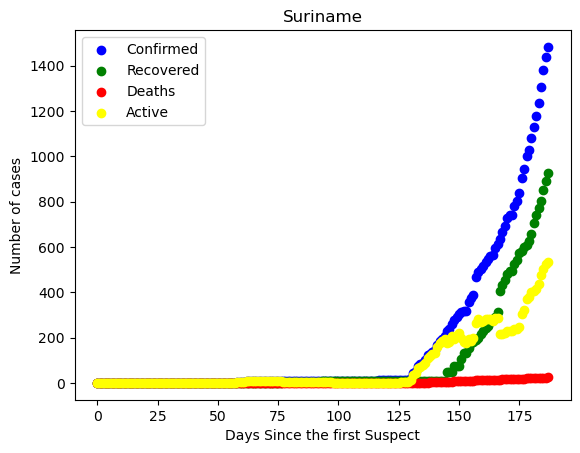

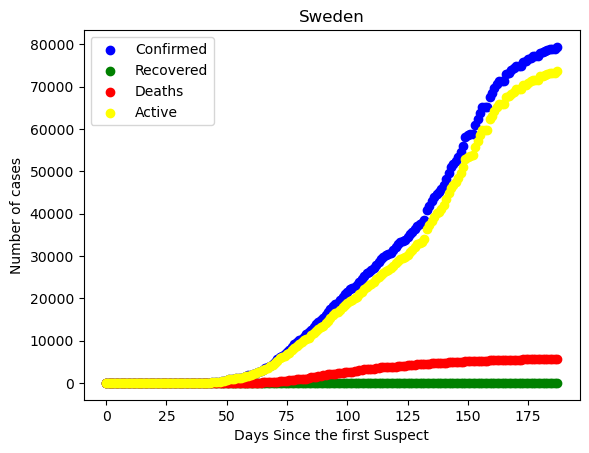

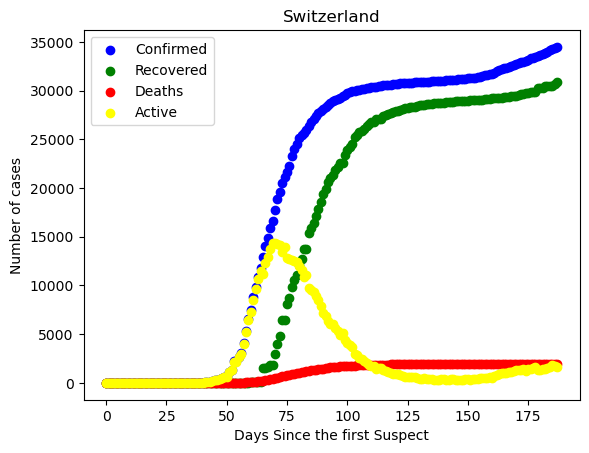

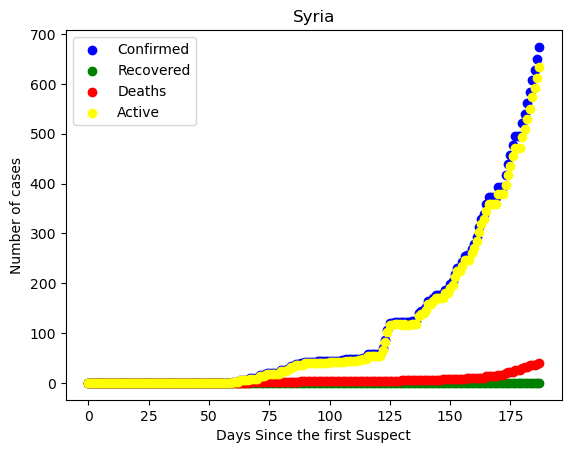

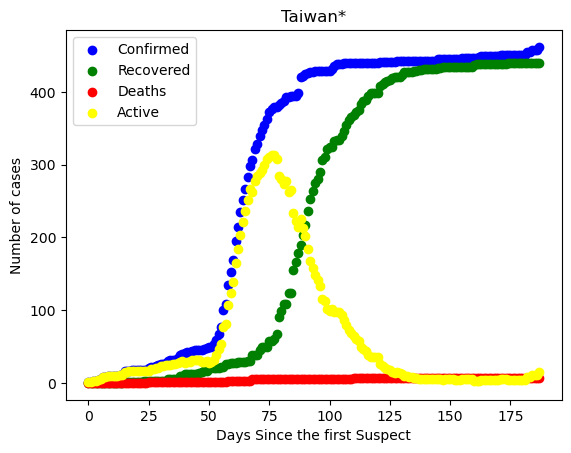

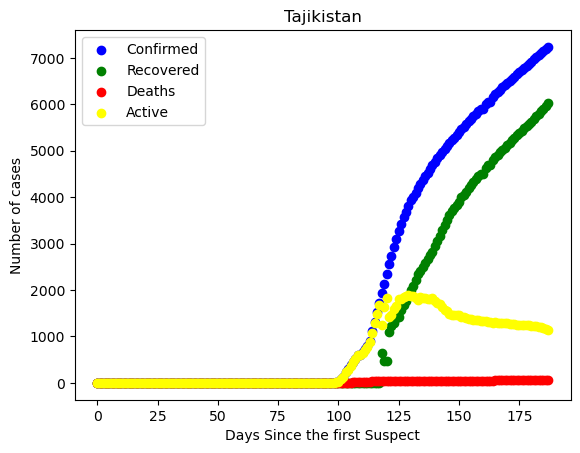

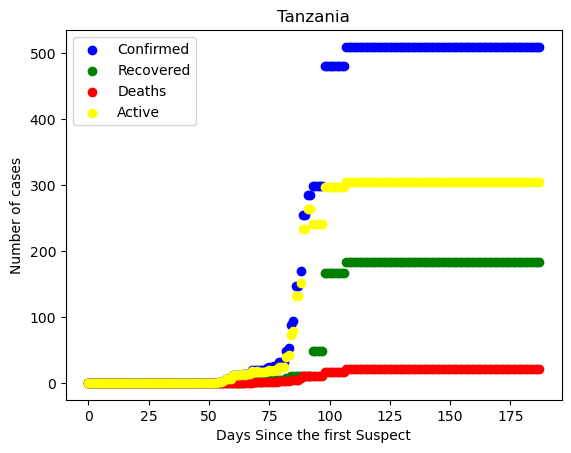

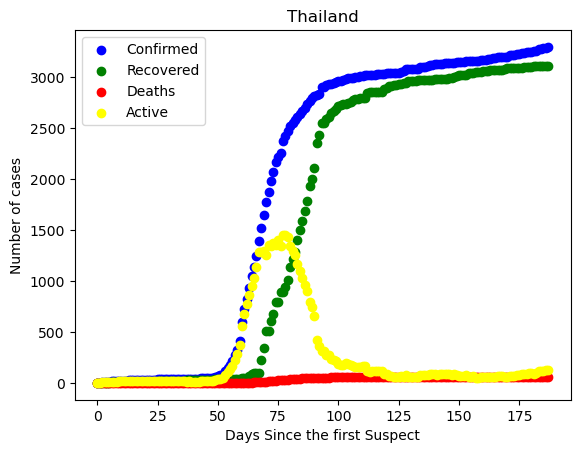

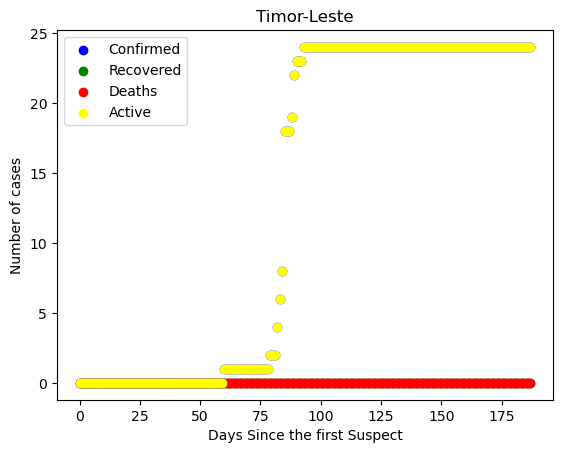

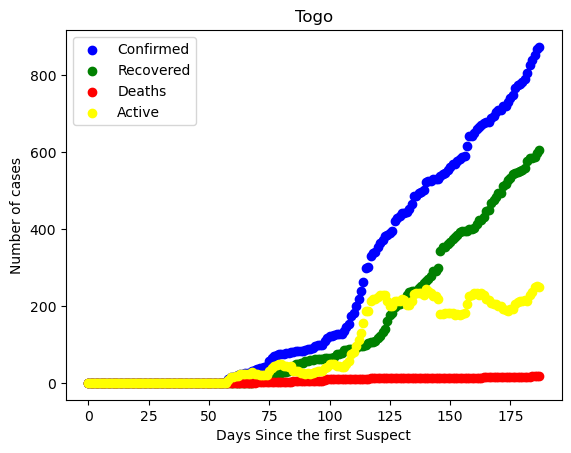

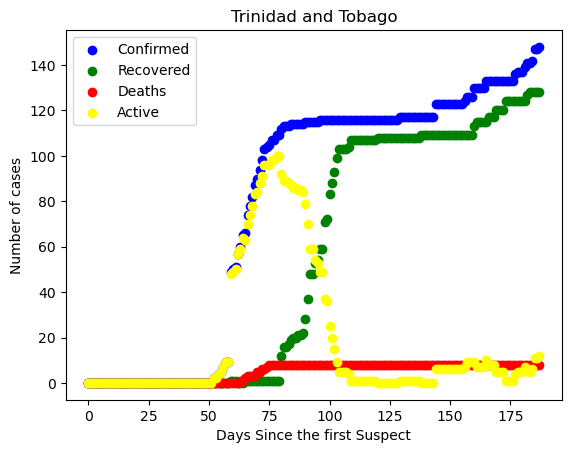

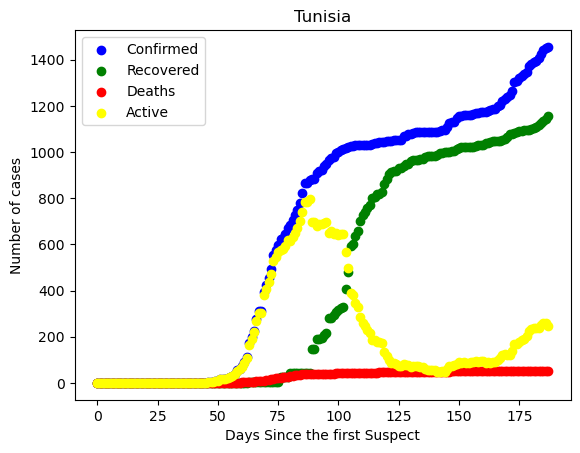

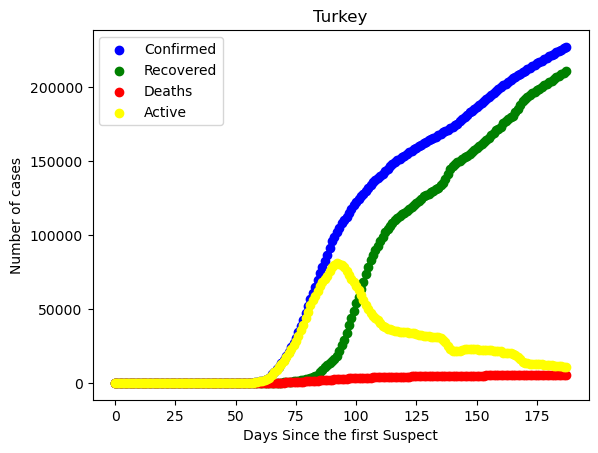

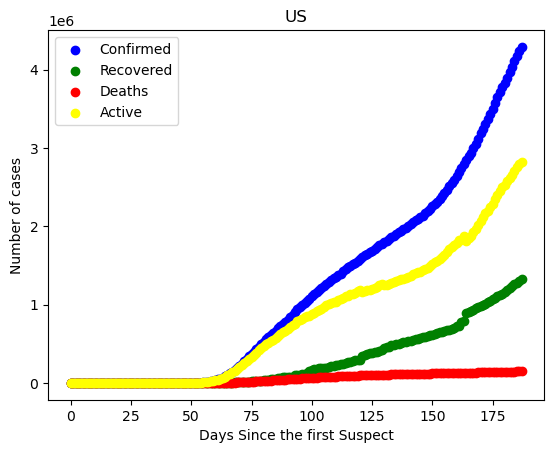

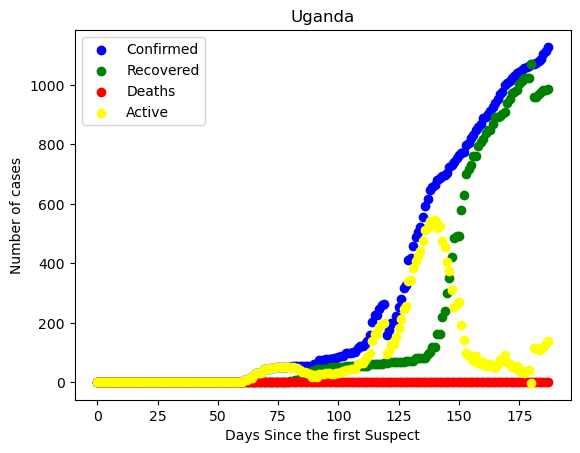

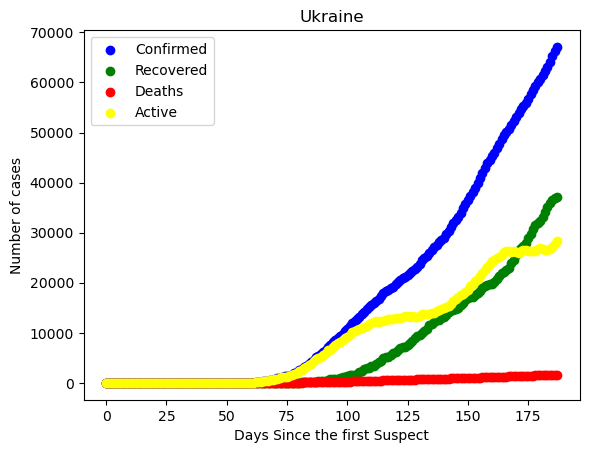

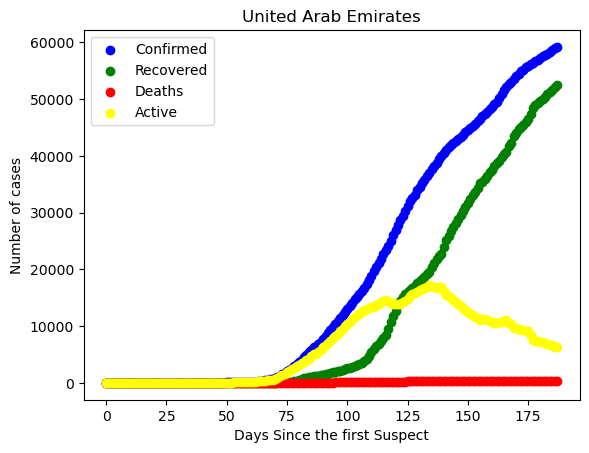

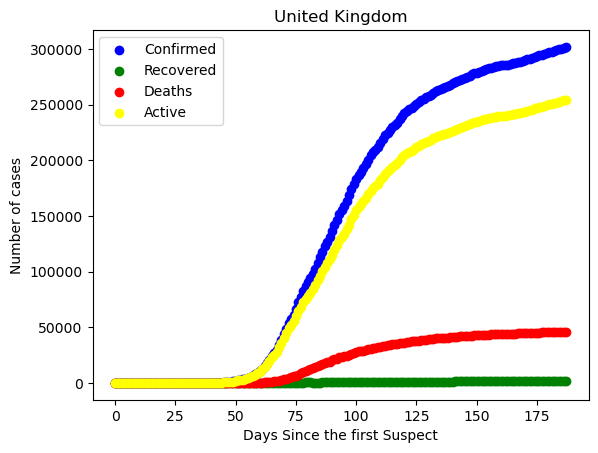

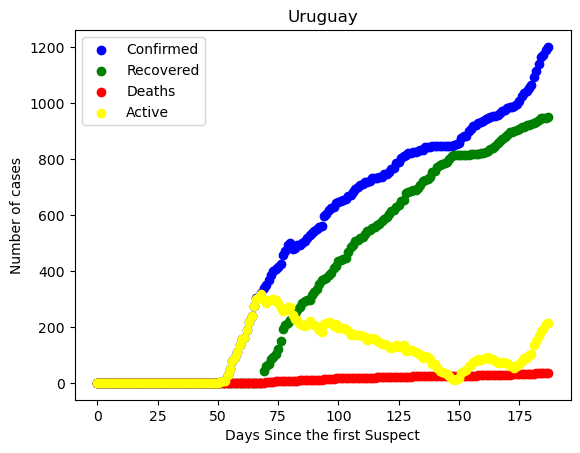

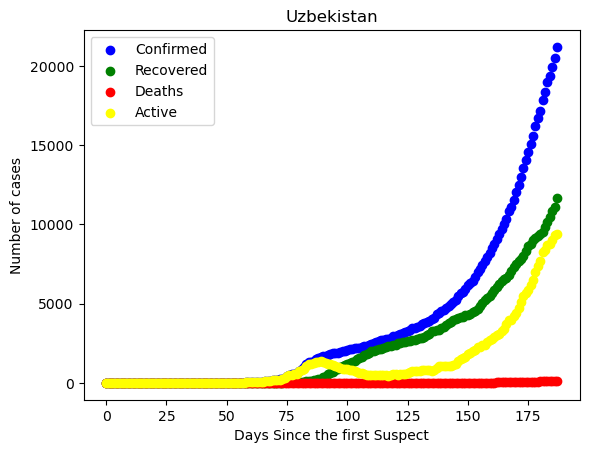

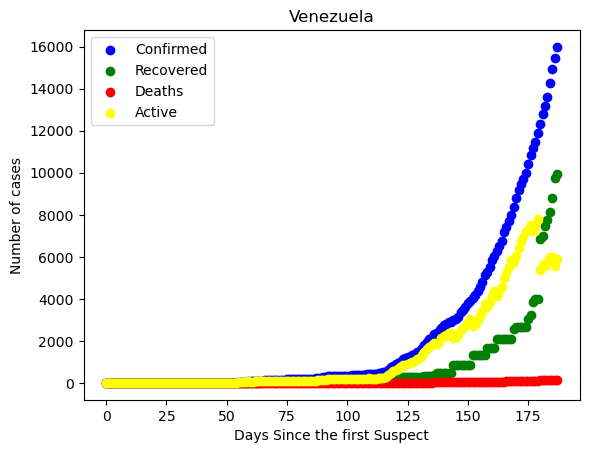

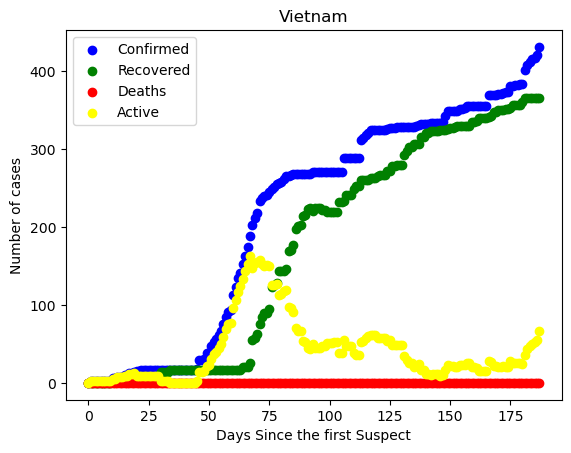

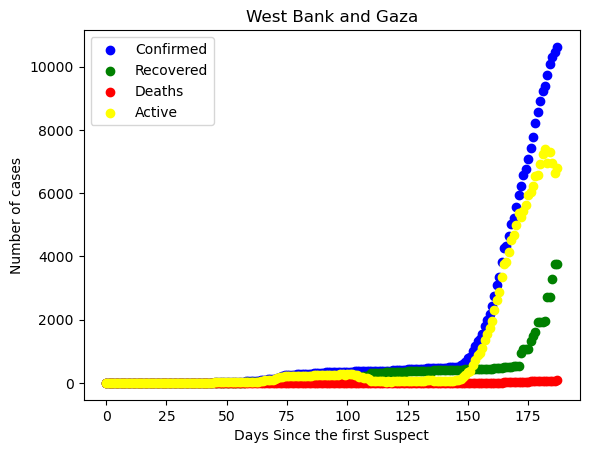

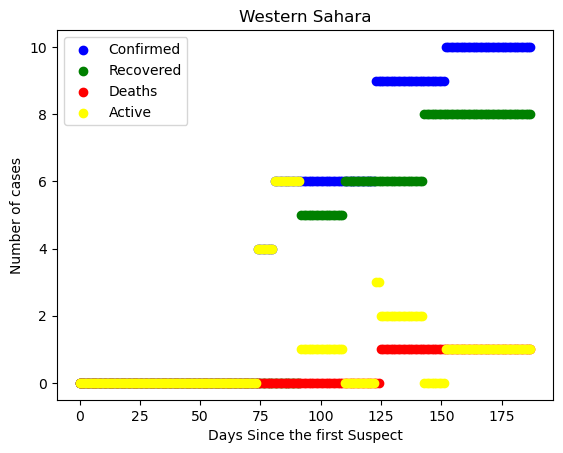

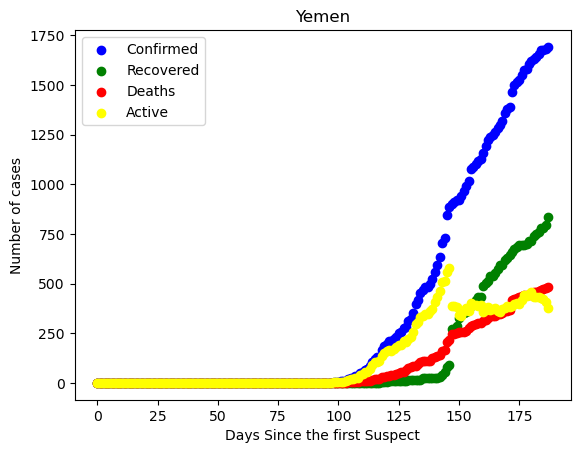

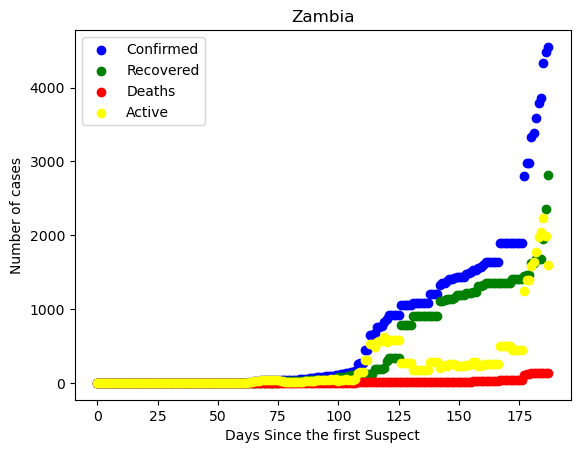

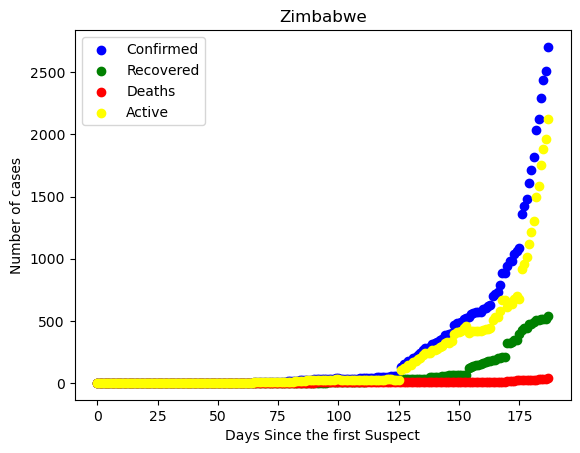

In [41]:
for idx in range(len(countries)):
    C = df3[df3['Country'] == countries[idx]].reset_index()
    plt.scatter(np.arange(len(C)), C['Confirmed'], color='blue', label='Confirmed')
    plt.scatter(np.arange(len(C)), C['Recovered'], color='green', label='Recovered')
    plt.scatter(np.arange(len(C)), C['Deaths'], color='red', label='Deaths')
    plt.scatter(np.arange(len(C)), C['Active'], color='yellow', label='Active')
    plt.title(countries[idx])
    plt.xlabel('Days Since the first Suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()


In [69]:
# Group by 'Date' and then sum the columns 'Confirmed', 'Deaths', and 'Active'
df4 = df3.groupby(['Date'])[['Confirmed', 'Deaths','Recovered', 'Active']].sum().reset_index()


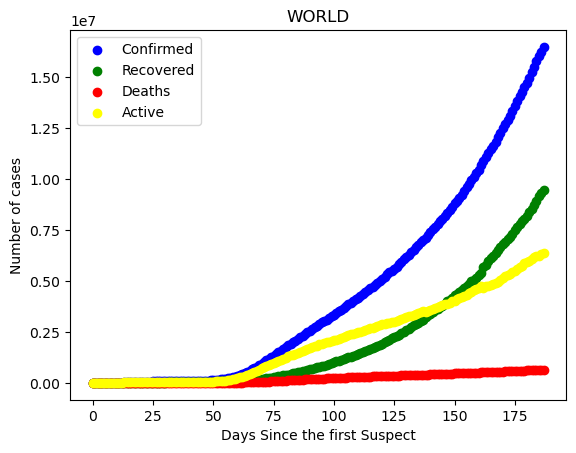

In [75]:
    C = df4
    plt.scatter(np.arange(0,len(C)), C['Confirmed'], color='blue', label='Confirmed')
    plt.scatter(np.arange(0,len(C)), C['Recovered'], color='green', label='Recovered')
    plt.scatter(np.arange(0,len(C)), C['Deaths'], color='red', label='Deaths')
    plt.scatter(np.arange(0,len(C)), C['Active'], color='yellow', label='Active')
    plt.title('WORLD')
    plt.xlabel('Days Since the first Suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()
